In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
import unicodedata
import string
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from kerastuner.tuners import RandomSearch
import matplotlib.pyplot as plt
import seaborn as sns
import json
import unicodedata
import string
import numpy as np
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import nltk
# Assurez-vous d'exécuter ceci pour télécharger les données nécessaires pour NLTK
nltk.download('punkt')

<ipython-input-2-aea3dbb78bc3>:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
citations = [
    "La vie est ce que nous en faisons. Les voyages sont les voyageurs. Ce que nous voyons n'est pas ce que nous voyons, mais ce que nous sommes. - Fernando Pessoa",
    "La vérité est un miroir tombé de la main de Dieu et qui s'est brisé. Chacun en ramasse un fragment et dit que toute la vérité est là. - Rumi",
    "Le succès, c'est aller d'échec en échec sans perdre son enthousiasme. - Winston Churchill",
    "La seule manière de faire du bon travail est d'aimer ce que vous faites. - Steve Jobs",
    "Le bonheur est lorsque vos actes sont en accord avec vos paroles. - Gandhi",
    "La vie n'est pas d'attendre que les orages passent, c'est d'apprendre à danser sous la pluie. - Sénèque",
    "Le seul véritable voyage, c'est de changer de regard. - Marcel Proust",
    "La folie, c'est de se comporter de la même manière et s'attendre à un résultat différent. - Albert Einstein",
    "Il n'y a pas de chemin vers le bonheur, le bonheur est le chemin. - Bouddha",
    "L'imagination est plus importante que le savoir. - Albert Einstein",
    "Le courage n'est pas l'absence de peur, mais la capacité de la vaincre. - Nelson Mandela",
    "La vie est trop courte pour être petite. - Disraeli",
    "Rien ne développe l'intelligence comme les voyages. - Émile Zola",
    "Soyez le changement que vous voulez voir dans le monde. - Gandhi",
    "La connaissance parle, mais la sagesse écoute. - Jimi Hendrix",
    "L'échec est le fondement de la réussite. - Lao Tseu",
    "L'amour est la force la plus puissante du monde, et pourtant c'est la plus humble qui soit. - Gandhi",
    "Ce n'est pas ce que vous regardez qui compte, c'est ce que vous voyez. - Henry David Thoreau",
    "Le secret du bonheur, c'est la liberté. Le secret de la liberté, c'est le courage. - Thucydide",
    "Le plus grand risque est de ne prendre aucun risque. - Mark Zuckerberg",
    "L'âme n'a pas de secret que la conduite ne révèle. - Léonard de Vinci",
    "La vie est un mystère qu'il faut vivre, et non un problème à résoudre. - Gandhi",
    "L'avenir appartient à ceux qui croient en la beauté de leurs rêves. - Eleanor Roosevelt",
    "La véritable générosité envers l'avenir consiste à tout donner au présent. - Albert Camus",
    "On ne voit bien qu'avec le cœur. L'essentiel est invisible pour les yeux. - Antoine de Saint-Exupéry",
    "L'important n'est pas ce que l'on regarde, mais ce que l'on voit. - Henry David Thoreau",
    "La sagesse, c'est d'avoir des rêves suffisamment grands pour ne pas les perdre de vue lorsqu'on les poursuit. - Oscar Wilde",
    "Le bonheur est quelque chose qui se multiplie quand il se divise. - Paulo Coelho",
    "Les seules limites qui existent sont celles que l'on s'impose. - Les Brown",
    "La seule façon de faire du bon travail est d'aimer ce que vous faites. - Steve Jobs",
    "La véritable grandeur d'un homme ne se mesure pas à des moments où il est à son aise, mais lorsqu'il traverse une période de controverses et de défis. - Martin Luther King Jr.",
    "Soyez vous-même ; tous les autres sont déjà pris. - Oscar Wilde",
    "Le bonheur, c'est de continuer à désirer ce que l'on possède. - Saint Augustin",
    "L'avenir appartient à ceux qui croient en la beauté de leurs rêves. - Eleanor Roosevelt",
    "L'éducation est l'arme la plus puissante qu'on puisse utiliser pour changer le monde. - Nelson Mandela",
    "Le véritable amour commence là où il n'y a pas d'attente. - Osho",
    "Si vous voulez vivre une vie heureuse, attachez-la à un but, pas à des personnes ou des choses. - Albert Einstein",
    "Il n'y a pas de raccourci pour un endroit qui vaut la peine d'être atteint. - Beverly Sills",
    "Le secret du bonheur et de la vertu est de substituer l'activité à la réflexion. - William Hazlitt",
    "La vie n'est pas d'attendre que les tempêtes passent, c'est d'apprendre à danser sous la pluie. - Vivian Greene",
    "L'homme qui déplace une montagne commence en déplaçant de petites pierres. - Confucius",
    "Le succès, c'est tomber sept fois, se relever huit. - Proverbe japonais",
    "Le désir de bien faire est un puissant moteur. - W. Clement Stone",
    "On ne perd jamais en tombant, mais en ne se relevant pas. - Nelson Mandela",
    "L'échec est le condiment qui donne sa saveur au succès. - Truman Capote",
    "Le plus grand plaisir dans la vie est de réaliser ce que les autres vous pensent incapables de réaliser. - Walter Bagehot",
    "Chaque sortie est un prétexte pour un nouveau départ. - George Eliot",
    "C'est dans les moments les plus sombres que nous devons nous concentrer pour voir la lumière. - Aristote",
    "Ne demandez pas ce que votre pays peut faire pour vous, demandez ce que vous pouvez faire pour votre pays. - John F. Kennedy",
    "La vie n'est pas d'attendre que la tempête passe, c'est d'apprendre à danser sous la pluie. - Sénèque",
    "Le véritable voyage ne consiste pas à chercher de nouveaux paysages, mais à avoir de nouveaux yeux. - Marcel Proust",
    "La créativité consiste à savoir comment cacher ses sources. - Albert Einstein",
    "Là où il y a de la volonté, il y a un chemin. - Winston Churchill",
    "Le succès, c'est être capable de passer d'échecs en échecs sans perdre son enthousiasme. - Winston Churchill",
    "L'imagination est la seule arme dans la guerre contre la réalité. - Lewis Carroll",
    "La patience est amère, mais son fruit est doux. - Jean-Jacques Rousseau",
    "La vie est un défi à relever, un bonheur à mériter, une aventure à tenter. - Mother Teresa",
    "Soyez vous-même, les autres sont déjà pris. - Oscar Wilde",
    "Le bonheur est souvent la seule chose qu'on puisse donner sans l'avoir et c'est en le donnant qu'on l'acquiert. - Voltaire",
    "L'avenir appartient à ceux qui croient en la beauté de leurs rêves. - Eleanor Roosevelt",
    "L'éducation est l'arme la plus puissante qu'on puisse utiliser pour changer le monde. - Nelson Mandela",
    "Le véritable amour commence là où il n'y a pas d'attente. - Osho",
    "Si vous voulez vivre une vie heureuse, attachez-la à un but, pas à des personnes ou des choses. - Albert Einstein",
    "Il n'y a pas de raccourci pour un endroit qui vaut la peine d'être atteint. - Beverly Sills",
    "Le secret du bonheur et de la vertu est de substituer l'activité à la réflexion. - William Hazlitt",
    "La vie n'est pas d'attendre que les tempêtes passent, c'est d'apprendre à danser sous la pluie. - Vivian Greene",
    "L'homme qui déplace une montagne commence en déplaçant de petites pierres. - Confucius",
    "Le succès, c'est tomber sept fois, se relever huit. - Proverbe japonais",
    "Le désir de bien faire est un puissant moteur. - W. Clement Stone",
    "On ne perd jamais en tombant, mais en ne se relevant pas. - Nelson Mandela",
    "L'échec est le condiment qui donne sa saveur au succès. - Truman Capote",
    "Le plus grand plaisir dans la vie est de réaliser ce que les autres vous pensent incapables de réaliser. - Walter Bagehot",
    "Chaque sortie est un prétexte pour un nouveau départ. - George Eliot",
    "C'est dans les moments les plus sombres que nous devons nous concentrer pour voir la lumière. - Aristote",
    "Ne demandez pas ce que votre pays peut faire pour vous, demandez ce que vous pouvez faire pour votre pays. - John F. Kennedy",
    "La vie n'est pas d'attendre que la tempête passe, c'est d'apprendre à danser sous la pluie. - Sénèque",
    "Le véritable voyage ne consiste pas à chercher de nouveaux paysages, mais à avoir de nouveaux yeux. - Marcel Proust",
    "La créativité consiste à savoir comment cacher ses sources. - Albert Einstein",
    "Là où il y a de la volonté, il y a un chemin. - Winston Churchill",
    "Le succès, c'est être capable de passer d'échecs en échecs sans perdre son enthousiasme. - Winston Churchill",
    "L'imagination est la seule arme dans la guerre contre la réalité. - Lewis Carroll",
    "La patience est amère, mais son fruit est doux. - Jean-Jacques Rousseau",
    "La vie est un défi à relever, un bonheur à mériter, une aventure à tenter. - Mother Teresa",
    "Soyez vous-même, les autres sont déjà pris. - Oscar Wilde",
    "Le bonheur est souvent la seule chose qu'on puisse donner sans l'avoir et c'est en le donnant qu'on l'acquiert. - Voltaire",
    "L'avenir appartient à ceux qui croient en la beauté de leurs rêves. - Eleanor Roosevelt",
    "L'éducation est l'arme la plus puissante qu'on puisse utiliser pour changer le monde. - Nelson Mandela",
    "Le véritable amour commence là où il n'y a pas d'attente. - Osho",
    "Si vous voulez vivre une vie heureuse, attachez-la à un but, pas à des personnes ou des choses. - Albert Einstein",
    "Il n'y a pas de raccourci pour un endroit qui vaut la peine d'être atteint. - Beverly Sills",
    "Le secret du bonheur et de la vertu est de substituer l'activité à la réflexion. - William Hazlitt",
    "La vie n'est pas d'attendre que les tempêtes passent, c'est d'apprendre à danser sous la pluie. - Vivian Greene",
    "L'homme qui déplace une montagne commence en déplaçant de petites pierres. - Confucius",
    "Le succès, c'est tomber sept fois, se relever huit. - Proverbe japonais",
    "Le désir de bien faire est un puissant moteur. - W. Clement Stone",
    "On ne perd jamais en tombant, mais en ne se relevant pas. - Nelson Mandela",
    "L'échec est le condiment qui donne sa saveur au succès. - Truman Capote",
    "Le plus grand plaisir dans la vie est de réaliser ce que les autres vous pensent incapables de réaliser. - Walter Bagehot",
    "Chaque sortie est un prétexte pour un nouveau départ. - George Eliot",
    "C'est dans les moments les plus sombres que nous devons nous concentrer pour voir la lumière. - Aristote",
    "Ne demandez pas ce que votre pays peut faire pour vous, demandez ce que vous pouvez faire pour votre pays. - John F. Kennedy",
    "La vie n'est pas d'attendre que la tempête passe, c'est d'apprendre à danser sous la pluie. - Sénèque",
    "Le véritable voyage ne consiste pas à chercher de nouveaux paysages, mais à avoir de nouveaux yeux. - Marcel Proust",
    "La créativité consiste à savoir comment cacher ses sources. - Albert Einstein",
    "Là où il y a de la volonté, il y a un chemin. - Winston Churchill",
    "Le succès, c'est être capable de passer d'échecs en échecs sans perdre son enthousiasme. - Winston Churchill",
    "L'imagination est la seule arme dans la guerre contre la réalité. - Lewis Carroll",
    "La patience est amère, mais son fruit est doux. - Jean-Jacques Rousseau",
    "La vie est un défi à relever, un bonheur à mériter, une aventure à tenter. - Mother Teresa",
    "Soyez vous-même, les autres sont déjà pris. - Oscar Wilde",
    "Le bonheur est souvent la seule chose qu'on puisse donner sans l'avoir et c'est en le donnant qu'on l'acquiert. - Voltaire",
    "L'avenir appartient à ceux qui croient en la beauté de leurs rêves. - Eleanor Roosevelt",
    "Le succès, c'est d'aller d'échec en échec sans perdre son enthousiasme. - Winston Churchill",
    "La vie n'est pas d'attendre que l'orage passe, c'est d'apprendre à danser sous la pluie. - Vivian Greene",
    "La vie est trop courte pour être petite. - Benjamin Disraeli",
    "L'échec est le condiment qui donne sa saveur au succès. - Truman Capote",
    "La plus grande gloire n'est pas de ne jamais tomber, mais de se relever à chaque chute. - Confucius",
    "Le bonheur est une décision, pas une condition. - Ralph Marston",
    "La véritable générosité envers l'avenir consiste à tout donner au présent. - Albert Camus",
    "Le succès, ce n'est pas d'avoir jamais échoué, mais d'avoir appris des erreurs pour mieux rebondir. - Richard Branson",
    "La vie, ce n'est pas attendre que les orages passent, c'est apprendre à danser sous la pluie. - Sénèque",
    "Le secret du bonheur, c'est de regarder chaque situation telle qu'elle est plutôt que de la voir telle que vous voulez qu'elle soit. - Unknown",
    "Le bonheur est souvent la seule chose qu'on puisse donner sans l'avoir, et c'est en le donnant qu'on l'acquiert. - Voltaire",
    "La vie est un mystère qu'il faut vivre, et non un problème à résoudre. - Gandhi",
    "L'âme n'a pas de secret que la conduite ne révèle. - Léonard de Vinci",
    "Le bonheur, c'est lorsque ce que vous pensez, ce que vous dites, et ce que vous faites sont en harmonie. - Gandhi",
    "La vie est une aventure audacieuse ou rien du tout. - Helen Keller",
    "L'avenir appartient à ceux qui se lèvent tôt. - Benjamin Franklin",
    "L'éducation est l'arme la plus puissante qu'on puisse utiliser pour changer le monde. - Nelson Mandela",
    "Le secret du bonheur, c'est de regarder chaque situation telle qu'elle est plutôt que de la voir telle que vous voulez qu'elle soit. - Unknown",
    "La seule limite à notre épanouissement de demain sera nos doutes d'aujourd'hui. - Franklin D. Roosevelt",
    "L'important n'est pas de convaincre, mais de donner à réfléchir. - Bernard Werber",
    "Le succès n'est pas la clé du bonheur. Le bonheur est la clé du succès. Si vous aimez ce que vous faites, vous réussirez. - Albert Schweitzer",
    "Le seul vrai voyage, c'est de ne pas avoir peur de changer. - Julie Burchill",
    "La véritable grandeur consiste à être maître de soi-même. - Platon",
    "Chaque jour est une nouvelle chance de changer votre vie. - Unknown",
    "Rien n'est impossible, le mot lui-même dit 'je suis possible' ! - Audrey Hepburn",
    "La vie est un défi à relever, un bonheur à mériter, une aventure à tenter. - Mother Teresa",
    "La vraie générosité envers l'avenir consiste à tout donner au présent. - Albert Camus",
    "La seule façon de faire du bon travail est d'aimer ce que vous faites. - Steve Jobs",
    "Le secret du bonheur, c'est la liberté. Le secret de la liberté, c'est le courage. - Thucydide",
    "Le bonheur est une direction, pas une destination. - Unknown",
    "Le seul endroit où le succès vient avant le travail, c'est dans le dictionnaire. - Vidal Sassoon",
    "La seule limite à nos réalisations de demain sera nos doutes d'aujourd'hui. - Franklin D. Roosevelt",
    "Chaque sortie est un prétexte pour un nouveau départ. - George Eliot",
    "Le bonheur est quelque chose qui se multiplie quand il se divise. - Paulo Coelho",
    "Le succès, c'est d'aller d'échec en échec sans perdre son enthousiasme. - Winston Churchill",
    "La vie est un mystère qu'il faut vivre, et non un problème à résoudre. - Gandhi",
    "Les opportunités sont souvent déguisées en travail, c'est pourquoi beaucoup de gens ne les reconnaissent pas. - Ann Landers",
    "Le succès, c'est d'aller d'échec en échec sans perdre son enthousiasme. - Winston Churchill",
    "Il n'y a pas de chemin vers le bonheur, le bonheur est le chemin. - Bouddha",
    "Le secret du bonheur, c'est de regarder chaque situation telle qu'elle est plutôt que de la voir telle que vous voulez qu'elle soit. - Unknown",
    "La vie est ce que nous en faisons. Les voyages sont les voyageurs. Ce que nous voyons n'est pas ce que nous voyons, mais ce que nous sommes. - Fernando Pessoa",
    "La vérité est un miroir tombé de la main de Dieu et qui s'est brisé. Chacun en ramasse un fragment et dit que toute la vérité est là. - Rumi",
    "Le succès, c'est aller d'échec en échec sans perdre son enthousiasme. - Winston Churchill",
    "La seule manière de faire du bon travail est d'aimer ce que vous faites. - Steve Jobs",
    "Le bonheur est lorsque vos actes sont en accord avec vos paroles. - Gandhi",
    "La vie n'est pas d'attendre que les orages passent, c'est d'apprendre à danser sous la pluie. - Sénèque",
    "Le seul véritable voyage, c'est de changer de regard. - Marcel Proust",
    "La folie, c'est de se comporter de la même manière et s'attendre à un résultat différent. - Albert Einstein",
    "Il n'y a pas de chemin vers le bonheur, le bonheur est le chemin. - Bouddha",
    "L'imagination est plus importante que le savoir. - Albert Einstein",
    "Le courage n'est pas l'absence de peur, mais la capacité de la vaincre. - Nelson Mandela",
    "La vie est trop courte pour être petite. - Disraeli",
    "Rien ne développe l'intelligence comme les voyages. - Émile Zola",
    "Soyez le changement que vous voulez voir dans le monde. - Gandhi",
    "La connaissance parle, mais la sagesse écoute. - Jimi Hendrix",
    "L'échec est le fondement de la réussite. - Lao Tseu",
    "L'amour est la force la plus puissante du monde, et pourtant c'est la plus humble qui soit. - Gandhi",
    "Ce n'est pas ce que vous regardez qui compte, c'est ce que vous voyez. - Henry David Thoreau",
    "Le secret du bonheur, c'est la liberté. Le secret de la liberté, c'est le courage. - Thucydide",
    "Le plus grand risque est de ne prendre aucun risque. - Mark Zuckerberg",
    "L'âme n'a pas de secret que la conduite ne révèle. - Léonard de Vinci",
    "La vie est un mystère qu'il faut vivre, et non un problème à résoudre. - Gandhi",
    "L'avenir appartient à ceux qui croient en la beauté de leurs rêves. - Eleanor Roosevelt",
    "La véritable générosité envers l'avenir consiste à tout donner au présent. - Albert Camus",
    "On ne voit bien qu'avec le cœur. L'essentiel est invisible pour les yeux. - Antoine de Saint-Exupéry",
    "L'important n'est pas ce que l'on regarde, mais ce que l'on voit. - Henry David Thoreau",
    "La sagesse, c'est d'avoir des rêves suffisamment grands pour ne pas les perdre de vue lorsqu'on les poursuit. - Oscar Wilde",
    "Le bonheur est quelque chose qui se multiplie quand il se divise. - Paulo Coelho",
    "Les seules limites qui existent sont celles que l'on s'impose. - Les Brown",
    "La vie est un cadeau, ouvrez-le avec soin. - Auteur inconnu",
    "Le bonheur est un choix, faites-le. - Auteur inconnu",
    "Le succès n'est pas final, l'échec n'est pas fatal, c'est le courage de continuer qui compte. - Winston Churchill",
    "La seule chose qui est constante dans la vie, c'est le changement. - Héraclite",
    "Le silence est l'ami de l'âme. - Proverbe chinois",
    "La beauté est dans les yeux de celui qui regarde. - Auteur inconnu",
    "L'amour est plus fort que la mort. - Victor Hugo",
    "La vie est une aventure, osez-la. - Paulo Coelho",
    "Le temps est précieux, ne le gaspillez pas. - Auteur inconnu",
    "Le rire est le meilleur remède. - Auteur inconnu",
    "La musique est la langue des émotions. - Auteur inconnu",
    "La lecture est la clé du monde. - Auteur inconnu",
    "Les voyages forment la jeunesse. - Proverbe latin",
    "La connaissance est le pouvoir. - Francis Bacon",
    "La patience est une vertu. - Proverbe français",
    "L'espoir est la force qui nous fait avancer. - Auteur inconnu",
    "La meilleure façon de prédire l'avenir est de le créer. - Abraham Lincoln",
    "La vie est une pièce de théâtre, jouez votre rôle avec brio. - Auteur inconnu",
    "La meilleure façon de trouver soi-même est de perdre soi-même dans la lutte pour quelque chose qui est plus grand que soi-même. - Martin Luther King Jr.",
    "Le monde est un endroit dangereux à vivre, non pas à cause de ceux qui font le mal, mais à cause de ceux qui ne font rien pour l'empêcher. - Albert Einstein",
    "L'espoir est un rêve qui ne dort jamais. - Edgar Allan Poe",
    "La foi est un don qui nous est accordé, mais l'espoir est une chose que nous devons cultiver. - Eleanor Roosevelt",
    "Le courage est la capacité de faire ce que vous devez faire, même lorsque vous avez peur de le faire. - Nelson Mandela",
    "La gentillesse est la langue que les sourds peuvent entendre et les aveugles peuvent voir. - Mark Twain",
    "La compassion est la langue de l'âme. - Proverbe chinois",
    "L'amour est la plus grande force de l'univers. - Mahatma Gandhi",
    "La paix est la tranquillité de l'âme. - Proverbe chinois",
    "La liberté est le droit de dire et de penser ce que l'on veut. - Voltaire",
    "L'égalité est le droit d'être traité de la même manière, quelle que soit votre race, votre religion ou votre sexe. - Martin Luther King Jr.",
    "La justice est le droit de chacun d'obtenir ce qui lui est dû. - Platon",
    "La vérité est ce qui est, pas ce que nous voulons qu'elle soit. - Mark Twain",
    "La beauté est dans l'œil de celui qui regarde. - Oscar Wilde",
    "L'amour est plus fort que la mort. - Victor Hugo",
    "L'espoir est la force qui nous fait avancer. - Auteur inconnu",
    "La vie est un voyage, pas une destination. - Auteur inconnu"
    "La vérité est toujours plus belle que le mensonge. - Proverbe français",
    "L'erreur est humaine, le pardon divin. - Proverbe français",
    "La vie est trop courte pour être petite. - Oscar Wilde",
    "Le bonheur est dans les petits moments. - Auteur inconnu",
    "L'amour est la réponse, ne demandez pas quelle est la question. - Auteur inconnu",
    "La patience est une vertu, mais l'impatience est souvent récompensée. - Auteur inconnu",
    "La vie est comme une bicyclette, il faut avancer pour ne pas tomber. - Albert Einstein",
    "Le rire est le meilleur remède. - Proverbe français",
    "La musique est la langue de l'âme. - Proverbe chinois",
    "La lecture est la clé du monde. - Auteur inconnu",
    "Les voyages forment la jeunesse. - Proverbe latin",
    "La connaissance est le pouvoir. - Francis Bacon",
    "La patience est une vertu. - Proverbe français",
    "L'espoir est la force qui nous fait avancer. - Auteur inconnu",
    "La vie est une série de choix, faites les bons. - Auteur inconnu",
    "Le bonheur est un état d'esprit, choisissez-le. - Auteur inconnu",
    "La réussite est la somme des petits efforts répétés jour après jour. - Robert Collier",
    "L'échec n'est pas la fin, c'est juste le début d'une nouvelle tentative. - Auteur inconnu",
    "La vie est trop courte pour être pessimiste. - Auteur inconnu",
    "L'amour est la force la plus puissante du monde. - Mahatma Gandhi",
    "La paix est l'absence de violence, mais c'est aussi la présence de justice et d'équité. - Auteur inconnu",
    "La liberté est le droit de faire ce que l'on veut, tant que cela ne nuit pas aux autres. - John Stuart Mill",
    "L'égalité est le droit d'être traité de la même manière, quelle que soit sa race, sa religion ou son sexe. - Martin Luther King Jr.",
    "La justice est le droit de chacun d'obtenir ce qui lui est dû. - Platon",
    "La vérité est ce qui est, pas ce que nous voulons qu'elle soit. - Mark Twain",
    "La beauté est dans l'œil de celui qui regarde. - Oscar Wilde",
    "L'amour est plus fort que la mort. - Victor Hugo",
    "L'espoir est la force qui nous fait avancer. - Auteur inconnu",
    "La gratitude est la plus grande des vertus. - Auteur inconnu",
    "La compassion est la langue de l'âme. - Proverbe chinois",
    "La gentillesse est la langue que les sourds peuvent entendre et les aveugles peuvent voir. - Mark Twain",
    "La vie est un cadeau, ouvrez-le avec soin. - Auteur inconnu",
    "Le bonheur est un choix, faites-le. - Auteur inconnu",
    "Le succès n'est pas final, l'échec n'est pas fatal, c'est le courage de continuer qui compte. - Winston Churchill",
    "La seule chose qui est constante dans la vie, c'est le changement. - Héraclite",
    "Le silence est l'ami de l'âme. - Proverbe chinois",
    "La beauté est dans les yeux de celui qui regarde. - Auteur inconnu",
    "L'amour est plus fort que la mort. - Victor Hugo",
    "La vie est une aventure, osez-la. - Paulo Coelho",
    "Le temps est précieux, ne le gaspillez pas. - Auteur inconnu",
    "Le rire est le meilleur remède. - Auteur inconnu",
    "La musique est la langue des émotions. - Auteur inconnu",
    "La lecture est la clé du monde. - Auteur inconnu",
    "Les voyages forment la jeunesse. - Proverbe latin",
    "La connaissance est le pouvoir. - Francis Bacon",
    "La patience est une vertu. - Proverbe français",
    "La dépression est un enfer, mais il y a une sortie. - J.K. Rowling",
    "La dépression est une maladie comme une autre, et elle peut être traitée. - Demi Lovato",
    "La dépression n'est pas un choix. C'est une maladie qui peut toucher n'importe qui. - Selena Gomez",
    "La dépression est une bataille difficile, mais elle vaut la peine d'être combattue. - Michelle Obama",
    "La dépression n'est pas un signe de faiblesse. C'est un signe que vous avez lutté plus fort que vous ne le pensiez possible. - Bear Grylls",
    "Il y a toujours de l'espoir, même dans les moments les plus sombres. - Nelson Mandela",
    "La dépression ne vous définit pas. C'est juste une partie de votre histoire. - NAMI",
    "Vous n'êtes pas seul. Il y a des gens qui se soucient de vous et veulent vous aider. - AFSP",
    "Vous pouvez surmonter cette épreuve. Vous êtes plus fort que vous ne le pensez. - Mental Health America",
    "La guérison de la dépression est possible, et il y a des gens qui veulent vous aider. - National Alliance on Mental Illness (NAMI)",
    "Il n'y a pas de solution unique pour guérir de la dépression. Ce qui fonctionne pour une personne peut ne pas fonctionner pour une autre. - American Foundation for Suicide Prevention (AFSP)",
    "La guérison de la dépression prend du temps et des efforts, mais c'est possible. - Mental Health America",
    "Il n'y a pas de honte à demander de l'aide. La dépression est une maladie grave, et il est important de demander de l'aide si vous en souffrez. - NAMI",
    "La résilience est la capacité de rebondir après une épreuve difficile. - American Psychological Association",
    "Les personnes résilientes ont tendance à avoir un sens de l'objectif, un réseau de soutien solide et une capacité à voir les choses du bon côté. - NAMI",
    "La résilience peut être apprise et cultivée. - AFSP",
    "Vous êtes résilient. Vous pouvez surmonter cette épreuve. - Mental Health America",
    "Il n'y a pas de honte à demander de l'aide. La dépression est une maladie grave, et il est important de demander de l'aide si vous en souffrez. - NAMI",
    "Il existe de nombreuses ressources disponibles pour vous aider à surmonter la dépression. N'hésitez pas à demander de l'aide. - AFSP",
    "Vous n'êtes pas seul. Il y a des gens qui se soucient de vous et veulent vous aider. - Mental Health America",
    "Prendre soin de soi est essentiel pour votre santé mentale et physique. - NAMI",
    "Il existe de nombreuses choses que vous pouvez faire pour prendre soin de vous, comme manger une alimentation saine, faire de l'exercice régulièrement et passer du temps avec les personnes que vous aimez. - AFSP",
    "Prendre soin de vous vous aidera à vous sentir mieux et à mieux gérer la dépression. - Mental Health America",
    "Il y a toujours de l'espoir, même dans les moments les plus sombres. - Nelson Mandela",
    "La dépression ne vous définit pas. C'est juste une partie de votre histoire. - NAMI",
    "Vous n'êtes pas seul. Il y a des gens qui se soucient de vous et veulent vous aider. - AFSP",
    "Vous pouvez surmonter cette épreuve. Vous êtes plus fort que vous ne le pensez. - Mental Health America",
    "L'argent ne fait pas le bonheur, mais il est certainement un moyen efficace pour y parvenir. - Albert Camus",
    "L'argent est un bon serviteur mais un mauvais maître. - Francis Bacon",
    "L'argent n'a pas d'odeur. - Vespasien",
    "L'argent est une chose merveilleuse. Il permet à celui qui l'a de faire tout ce qu'il veut, à celui qui ne l'a pas de faire tout ce qu'il peut. - Alphonse Allais",
    "L'argent ne peut pas acheter le bonheur, mais il vous permet de choisir le genre de misère que vous préférez. - Spike Milligan",
    "L'argent est comme le fumier : étalé, il ne sert à rien ; étalé, il fertilise. - Francis Bacon",
    "Il est difficile de trouver un homme si pauvre qu'il n'ait pas du tout d'argent. - Confucius",
    "L'argent ne fait pas le bonheur, mais il contribue largement à le rendre plus confortable. - Anonyme",
    "L'argent est comme un sixième sens sans lequel vous ne pouvez pas faire un usage complet des cinq autres. - William Somerset Maugham",
    "L'argent est le nerf de la guerre. - Jean de La Fontaine",
    "Le temps, c'est de l'argent. - Benjamin Franklin",
    "L'argent est un bon serviteur mais un mauvais maître. - Alexandre Dumas",
    "L'argent, c'est comme les jambes d'une mule ; il n'est utile qu'à celui qui sait s'en servir. - Sénèque",
    "L'argent est une richesse morte, le vrai trésor est celui de la vie. - Jacques Salomé",
    "L'argent est un excellent serviteur et un terrible maître. - P.T. Barnum",
    "L'argent ne représente pas tout, mais il en coûte cher pour vivre. - Robert Orben",
    "La richesse consiste bien plus dans l'usage que l'on fait de l'argent que dans l'argent lui-même. - Aristote",
    "Le vrai bonheur ne dépend d'aucun être, d'aucun objet extérieur. Il ne dépend que de nous... - Dalai Lama",
    "Si vous voulez connaître la valeur de l'argent, essayez d'en emprunter. - Benjamin Franklin",
    "L'argent est un moyen de cultiver la liberté, mais c'est aussi une manière de la perdre. - Jean-Jacques Rousseau",
    "La richesse est comme la mer : plus on en boit, plus on a soif. - Arthur Schopenhauer",
    "Celui qui veut tuer son chien l'accuse de la rage. - Proverbe français",
    "L'argent est un voile qui cache l'indigence de l'esprit. - François de La Rochefoucauld",
    "L'argent ne se mange pas - Proverbe indien",
    "L'argent est une richesse morte ; seule la vie est une richesse vivante. - Jacques Salomé",
    "L'argent ne fait pas le bonheur, mais il contribue à l'améliorer. - Woody Allen",
    "L'argent peut acheter le lit, mais pas le sommeil - Proverbe chinois",
    "L'argent est un bon serviteur et un mauvais maître - Francis Bacon",
    "Il y a quelque chose de plus important que l'argent : l'honneur et la dignité - Nelson Mandela",
    "L'argent ne vaut que s'il est dépensé. - Georg Wilhelm Friedrich Hegel",
    "L'éducation est la clé pour ouvrir la porte dorée de la connaissance. - George Washington Carver",
    "Les études forment l'esprit, ouvrent des horizons et offrent des perspectives infinies. - Albert Einstein",
    "L'apprentissage est un trésor qui suit son propriétaire partout. - Proverbe chinois",
    "L'éducation est l'arme la plus puissante que l'on puisse utiliser pour changer le monde. - Nelson Mandela",
    "Les livres sont les amis les plus silencieux et les plus constants ; ils sont les conseillers les plus accessibles et les plus sages. - Charles W. Eliot",
    "Apprendre, c'est découvrir que quelque chose est possible. - Fritz Perls",
    "L'éducation coûte cher, mais l'ignorance coûte bien plus cher. - Sir Claus Moser",
    "Les études ne se limitent pas à l'école, mais à toute la vie. - Henry Ford",
    "Savoir que l'on sait ce que l'on sait et savoir que l'on ne sait pas ce que l'on ne sait pas, voilà la vraie intelligence. - Confucius",
    "Les études ne consistent pas seulement à apprendre, mais à comprendre. - Muhammad Ali",
    "La connaissance, c'est le début de la compréhension de soi. - Benjamin Franklin",
    "L'ignorance, c'est l'esclavage de l'esprit ; le savoir, c'est la liberté. - Miguel de Cervantes",
    "Les livres sont les fenêtres par lesquelles le soleil entre dans l'âme. - Henry Ward Beecher",
    "L'éducation est l'arme la plus puissante pour changer le monde. - Malala Yousafzai",
    "Les études sont le point de départ pour réaliser ses rêves les plus fous. - Oprah Winfrey",
    "Apprendre sans réfléchir est vain. Réfléchir sans apprendre est dangereux. - Confucius",
    "Les livres sont des trésors remplis de connaissances, ouverts à tous ceux qui veulent apprendre. - Helen Keller",
    "L'éducation n'est pas la préparation à la vie ; l'éducation est la vie elle-même. - John Dewey",
    "La sagesse vient de l'apprentissage, mais le vrai savoir vient de la compréhension. - Anthony J. D'Angelo",
    "Chaque livre, chaque étude nous apporte quelque chose de nouveau, élargissant nos horizons. - J.K. Rowling",
    "Les études sont les piliers de la pensée, façonnant l'avenir et éclairant le chemin. - Socrate",
    "L'éducation est la clé qui ouvre la porte à un monde d'opportunités. - Oprah Winfrey",
    "Le seul véritable échec, c'est de ne pas essayer d'apprendre. - George Washington Carver",
    "Les études sont comme un phare dans l'obscurité, guidant vers un avenir lumineux. - Albert Schweitzer",
    "Savoir que l'on ne sait pas, c'est le début de la sagesse. - Socrate",
    "L'apprentissage est un voyage sans fin, rempli de découvertes et d'émotions. - Oprah Winfrey",
    "La connaissance est le pouvoir qui ouvre les portes du succès. - Benjamin Franklin",
    "Les études sont les racines de la connaissance, cultivant des fruits pour une vie enrichissante. - Aristotle",
    "Apprendre aujourd'hui pour comprendre demain et agir pour un meilleur futur. - Nelson Mandela",
    "L'éducation est la lumière qui illumine le chemin vers la grandeur. - Martin Luther King Jr.",
    "L'anxiété est comme une balançoire émotionnelle, mais elle ne peut pas vous empêcher de balancer.",
    "L'anxiété est une énergie qui attend d'être transformée en créativité.",
    "L'anxiété est le prix que nous payons pour une imagination exceptionnelle.",
    "L'anxiété est comme une tempête. Mais après chaque tempête vient le calme.",
    "L'anxiété est un appel à l'introspection, une opportunité de comprendre nos craintes les plus profondes.",
    "L'anxiété est le souffle irrégulier de nos peurs, mais la volonté de continuer à respirer est notre force.",
    "L'anxiété n'est pas un signe de faiblesse, mais une manifestation de notre humanité.",
    "L'anxiété peut être une alarme, mais elle ne définit pas notre destin.",
    "L'anxiété est comme une musique dissonante, mais avec le temps, elle peut se transformer en une mélodie harmonieuse.",
    "L'anxiété n'est pas un obstacle, mais une opportunité de développer la résilience.",
    "L'anxiété est comme une vague, elle monte et descend, mais elle ne peut pas nous submerger.",
    "L'anxiété est une ombre temporaire dans la lumière de notre force intérieure.",
    "L'anxiété peut être apaisée par la sagesse de la patience et de la compréhension de soi.",
    "L'anxiété est un invité temporaire, mais le calme intérieur est notre demeure permanente.",
    "L'anxiété peut être une danse avec nos émotions, mais nous contrôlons toujours les pas.",
    "L'anxiété est comme un nuage passager dans le ciel de notre esprit.",
    "L'anxiété peut être un cri silencieux, mais l'écoute de soi peut être la réponse.",
    "L'anxiété est une peur future, mais le présent est notre refuge.",
    "L'anxiété est une vague émotionnelle, mais elle ne peut pas emporter notre ancre intérieure.",
    "L'anxiété peut être comme une tempête dans un verre d'eau, mais elle se calme avec le temps.",
    "L'anxiété peut être un réveil brutal, mais aussi une invitation à se recentrer.",
    "L'anxiété est un nuage qui peut se dissiper avec les rayons de la confiance en soi.",
    "L'anxiété peut être une tempête émotionnelle, mais chaque tempête trouve un apaisement.",
    "L'anxiété est une leçon pour apprendre à naviguer à travers les eaux troubles de nos pensées.",
    "L'anxiété est un appel à la compassion envers nous-mêmes et envers les autres.",
    "L'anxiété est une plume légère qu'un souffle de paix peut faire s'envoler.",
    "L'anxiété est un chemin sinueux, mais la patience est notre guide.",
    "L'anxiété est une énigme, mais la découverte de soi est notre solution.",
    "L'anxiété est un tableau éphémère de nos inquiétudes, mais notre force intérieure est permanente.",
    "L'anxiété peut être assombrie par la lumière de la persévérance et de la résolution.",
    "La femme est l'incarnation de la force douce et de la grâce infinie.",
    "La femme est un mystère aux multiples facettes, toujours en évolution.",
    "La femme est une toile tissée de courage et d'élégance.",
    "La femme est l'équilibre entre la délicatesse et la résilience.",
    "La femme est une symphonie de puissance silencieuse et de sagesse profonde.",
    "La femme est une fleur qui épanouit son essence dans la diversité de ses pétales.",
    "La femme est une étoile brillante illuminant les horizons sombres de la vie.",
    "La femme est un océan de compassion et de force indomptable.",
    "La femme est le pilier de la famille, la gardienne des traditions et la fondation de l'avenir.",
    "La femme est la quintessence de la beauté intérieure et extérieure.",
    "La femme est la créatrice de ponts entre les cœurs et les âmes.",
    "La femme est un livre vivant, empli de chapitres d'expériences et de sagesse.",
    "La femme est une constellation d'étoiles brillantes dans l'univers de la vie.",
    "La femme est une rivière fluide de persévérance et de détermination.",
    "La femme est l'architecte de rêves, bâtissant des mondes avec ses aspirations.",
    "La femme est une mélodie envoûtante, apportant harmonie et émotion à la vie.",
    "La femme est une rose épanouie, exhalant le parfum de la grâce et de la résistance.",
    "La femme est une énigme captivante, pleine de mystère et d'intelligence.",
    "La femme est un soleil radieux, irradiant chaleur et lumière partout où elle va.",
    "La femme est la personnification de la tendresse et de la détermination.",
    "La femme est un chef-d'œuvre artistique, sculpté avec soin et amour.",
    "La femme est un phare de sagesse, guidant avec sérénité à travers les tempêtes de la vie.",
    "La femme est un jardin d'espoir, cultivant des fleurs de courage et de confiance.",
    "La femme est un diamant précieux, étincelant de vertus variées et inestimables.",
    "La femme est une plume délicate, écrivant son histoire avec grâce et détermination.",
    "La femme est une éclipse lumineuse, illuminant les moments sombres de la vie.",
    "La femme est une montagne majestueuse, résistante et inébranlable face à l'adversité.",
    "La femme est une peinture vibrante, colorant la toile de la vie de sa force et de sa grâce.",
    "La femme est une constellation d'étoiles, chacune racontant une histoire unique et brillante.",
    "La femme est une fontaine intarissable d'amour et de résilience, nourrissant le monde de sa compassion.",
    "L'homme est l'incarnation de la force et de la détermination, un roc solide dans la tempête de la vie.",
    "L'homme est un artisan de son destin, forgeant son avenir avec persévérance et courage.",
    "L'homme est une étoile brillante, illuminant le chemin avec sa résolution et sa sagesse.",
    "L'homme est un pilier de stabilité, apportant force et soutien là où il est nécessaire.",
    "L'homme est la quintessence de la détermination, avançant avec fermeté vers ses objectifs.",
    "L'homme est un architecte de rêves, bâtissant des ponts vers un avenir meilleur.",
    "L'homme est une symphonie de caractère et de courage, composant sa vie avec harmonie.",
    "L'homme est une constellation d'espoir et de résilience, guidant avec assurance vers la réussite.",
    "L'homme est un gardien de valeurs, préservant les traditions et façonnant le futur.",
    "L'homme est une rivière de volonté, traversant les obstacles avec détermination.",
    "L'homme est un maître de sa destinée, naviguant avec audace à travers les eaux de la vie.",
    "L'homme est une énigme captivante, mêlant intelligence et force avec élégance.",
    "L'homme est un soleil rayonnant, irradiant chaleur et lumière dans son entourage.",
    "L'homme est un phare de sagesse, éclairant le chemin avec perspicacité et expérience.",
    "L'homme est une éclipse lumineuse, brillant même dans les moments les plus sombres.",
    "L'homme est un bastion de courage, résistant face à l'adversité avec dignité.",
    "L'homme est une étoile filante, laissant une trajectoire lumineuse dans son sillage.",
    "L'homme est un symbole de fiabilité, offrant son soutien avec loyauté et honnêteté.",
    "L'homme est une peinture vibrante, colorant la toile de la vie avec sa force et sa volonté.",
    "L'homme est une source de persévérance, surmontant les défis avec résolution.",
    "L'homme est une montagne d'endurance, résistant avec constance face aux tempêtes.",
    "L'homme est une plume forte, écrivant son histoire avec audace et conviction.",
    "L'homme est une constellation d'expérience, chaque étoile représentant un chapitre unique.",
    "L'homme est un diamant précieux, étincelant de vertus et de valeurs inestimables.",
    "L'homme est un jardinier de sa destinée, cultivant les fruits de son travail avec détermination.",
    "L'homme est une flamme intérieure, brûlant avec passion et détermination.",
    "L'homme est un voyageur de l'existence, explorant le monde avec curiosité et bravoure.",
    "L'homme est un artisan du courage, façonnant son caractère avec honneur et intégrité.",
    "L'homme est un guide de sagesse, partageant son savoir avec générosité et humilité.",
    "L'homme est un phénix renaissant, émergeant plus fort des cendres des épreuves.",
    "La mère est le cœur battant de la famille, un pilier de force et de tendresse.",
    "La mère est l'essence même de l'amour inconditionnel et du dévouement infini.",
    "La mère est un phare de guidance, illuminant le chemin avec son affection et sa sagesse.",
    "La mère est une gardienne de rêves, nourrissant les aspirations de ses enfants.",
    "La mère est une source intarissable de compassion et de réconfort, toujours présente dans les moments difficiles.",
    "La mère est une étoile brillante dans le firmament familial, apportant chaleur et lumière à chacun.",
    "La mère est une architecte de bonheur, construisant des souvenirs précieux et des moments inoubliables.",
    "La mère est une symphonie d'amour, chaque note jouée avec dévotion pour sa famille.",
    "La mère est une forteresse de protection, garantissant sécurité et soutien à ses proches.",
    "La mère est un jardin fertile, cultivant les graines de la confiance et de l'estime de soi.",
    "La mère est une éducatrice par excellence, enseignant avec patience et bienveillance.",
    "La mère est une muse inspirante, guidant ses enfants vers l'épanouissement de leur potentiel.",
    "La mère est une étreinte chaleureuse, offrant réconfort et douceur dans les moments de peine.",
    "La mère est un livre d'histoires infinies, transmettant la sagesse et les leçons de vie.",
    "La mère est un roc solide, ancrant la famille dans l'amour et la cohésion.",
    "La mère est une fontaine de patience, irriguant les moments de croissance et d'apprentissage.",
    "La mère est une alchimiste, transformant les instants simples en souvenirs précieux.",
    "La mère est une gardienne des traditions, transmettant l'héritage familial avec fierté.",
    "La mère est un symbole de courage et de résilience, surmontant les défis avec détermination.",
    "La mère est un artisan de joie, créant un foyer empli de bonheur et de bien-être.",
    "La mère est une fleur épanouie, diffusant le parfum de l'amour et de la bienveillance.",
    "La mère est un refuge sûr, un havre de paix dans les tourments de la vie.",
    "La mère est une étoile polaire, guidant ses enfants à travers les hauts et les bas.",
    "La mère est une artiste de la vie quotidienne, peignant des moments précieux sur la toile du temps.",
    "La mère est une éducatrice naturelle, partageant des leçons de vie à chaque instant.",
    "La mère est un cadeau précieux, une présence sacrée dans le voyage de la vie.",
    "La mère est un ange gardien, veillant sur sa famille avec dévotion et amour infini.",
    "La mère est une lumière dans l'obscurité, illuminant le chemin de ses enfants.",
    "La mère est une source d'inspiration, donnant des ailes pour atteindre les rêves les plus fous.",
    "La mère est une boussole morale, indiquant la direction avec sagesse et bienveillance.",
    "Le père est le rocher solide sur lequel se construit la famille, une présence constante et rassurante.",
    "Le père est l'architecte de l'héritage familial, transmettant des valeurs et des leçons de vie.",
    "Le père est un pilier de force, offrant protection et sécurité à ses proches.",
    "Le père est un gardien de l'espoir, guidant ses enfants vers un avenir prometteur.",
    "Le père est un maître de patience, enseignant avec bienveillance et persévérance.",
    "Le père est une étoile dans le ciel familial, illuminant les chemins de ses enfants.",
    "Le père est un conteur d'histoires, partageant des récits et des expériences enrichissantes.",
    "Le père est un modèle de détermination, montrant l'importance du travail et de la ténacité.",
    "Le père est un guide bienveillant, offrant des conseils avisés et un soutien inconditionnel.",
    "Le père est un artisan du bonheur, créant des moments de joie et de complicité.",
    "Le père est un bâtisseur d'espoir, érigeant des ponts vers les rêves de ses enfants.",
    "Le père est une source d'inspiration, encourageant l'épanouissement et la croissance personnelle.",
    "Le père est une épaule solide, prête à soutenir et à réconforter en tout temps.",
    "Le père est un pilote expérimenté, guidant la famille à travers les défis de la vie.",
    "Le père est un protecteur dévoué, veillant sur sa famille avec amour et détermination.",
    "Le père est un gardien des valeurs, transmettant l'importance de l'intégrité et du respect.",
    "Le père est un phare de sagesse, éclairant le chemin vers la réussite et le bonheur.",
    "Le père est un mentor de confiance, offrant son savoir et son expérience pour guider ses enfants.",
    "Le père est un artisan de courage, inspirant la force et la résilience au sein de la famille.",
    "Le père est une source de fierté, célébrant les succès et encourageant face aux échecs.",
    "Le père est un compagnon de jeux, partageant des moments de complicité et de rires avec ses enfants.",
    "Le père est un éducateur naturel, donnant des leçons de vie précieuses à chaque opportunité.",
    "Le père est un pilier d'équilibre, maintenant la stabilité et l'harmonie au sein de la famille.",
    "Le père est un guide sûr, offrant son soutien et ses conseils dans les moments difficiles.",
    "Le père est un modèle d'humilité, enseignant l'importance de la modestie et de la gratitude.",
    "Le père est un jardinier de talents, encourageant la croissance et l'épanouissement individuel.",
    "Le père est un défenseur des rêves, encourageant l'ambition et l'exploration.",
    "Le père est un artisan de confiance, créant un foyer où chacun se sent en sécurité.",
    "Le père est un pilier de soutien, offrant son aide et sa présence dans chaque étape de la vie.",
    "Le père est un phare de stabilité, offrant un ancrage sûr dans les tempêtes de la vie.",
    "La famille est le cœur de nos vies, un refuge sûr dans les hauts et les bas.",
    "La famille est une toile tissée de souvenirs précieux et de moments inoubliables.",
    "La famille est un jardin où l'amour fleurit, cultivant des liens forts et durables.",
    "La famille est un écho de rires et de sourires, remplissant nos vies de bonheur et de joie.",
    "La famille est un puzzle où chaque membre est une pièce précieuse de l'ensemble.",
    "La famille est une symphonie d'amour, chaque membre jouant une note essentielle.",
    "La famille est une forteresse de soutien, offrant force et réconfort en toute circonstance.",
    "La famille est un cercle de confiance, où chacun trouve refuge et compréhension.",
    "La famille est un océan d'amour, infini et profond dans ses liens affectifs.",
    "La famille est une histoire vivante, évoluant avec chaque chapitre de nos vies.",
    "La famille est une école de valeurs, enseignant l'importance de l'unité et de la solidarité.",
    "La famille est une promesse de soutien, chaque membre prêt à être là pour les autres.",
    "La famille est une étoile dans le ciel de nos vies, éclairant nos chemins dans l'obscurité.",
    "La famille est un abri dans la tempête, offrant chaleur et réconfort quand les temps sont difficiles.",
    "La famille est une constellation d'amour, brillant de mille feux à chaque moment partagé.",
    "La famille est une chorale d'affection, chaque voix ajoutant une mélodie spéciale à l'ensemble.",
    "La famille est un phare de guidance, offrant conseils et conseils pour naviguer dans la vie.",
    "La famille est un trésor de souvenirs, chaque moment précieux gardé précieusement.",
    "La famille est un refuge sacré, où l'on peut être soi-même sans réserve ni jugement.",
    "La famille est une toile tissée de différences, créant une richesse dans sa diversité.",
    "La famille est une école de patience, apprenant à s'aimer malgré les imperfections.",
    "La famille est un bastion de soutien, offrant un réseau de sécurité émotionnelle.",
    "La famille est un jardin d'évolution, chaque membre grandissant et évoluant ensemble.",
    "La famille est un tableau d'entraide, où chacun contribue à l'épanouissement des autres.",
    "La famille est un livre ouvert, rempli de chapitres d'émotions, de défis et de triomphes.",
    "La famille est une équipe, se soutenant mutuellement dans les bons comme dans les mauvais moments.",
    "La famille est un phénix, renaissant plus forte des cendres des difficultés.",
    "La famille est une couronne de joyaux, chaque membre étant une pierre précieuse à chérir.",
    "La famille est un héritage précieux, transmettant des valeurs et des traditions de génération en génération.",
    "La famille est un navire, naviguant sur les mers de la vie avec unité et amour pour boussole.",
    "Le frère est un compagnon de route, un ami pour les jours sombres et lumineux."
    "Le frère est un confident fidèle, un gardien de secrets précieux.",
    "Le frère est un lien éternel, un lien indéfectible même dans les moments de distance.",
    "Le frère est un pilier de soutien, offrant force et présence dans les épreuves de la vie.",
    "Le frère est un miroir d'inspiration, encourageant à viser plus haut et à réaliser ses rêves.",
    "Le frère est un complice de joies, partageant des moments de rire et de complicité.",
    "Le frère est un gardien de souvenirs, tissant des histoires qui resteront à jamais gravées.",
    "Le frère est un confident de confiance, écoutant sans jugement et offrant des conseils avisés.",
    "Le frère est un roc solide, offrant un soutien inébranlable dans les tempêtes de la vie.",
    "Le frère est un exemple de loyauté, un allié pour affronter les défis ensemble.",
    "Le frère est un catalyseur de croissance, poussant à devenir meilleur chaque jour.",
    "Le frère est un trésor familial, apportant des couleurs uniques à la toile de la vie.",
    "Le frère est un pilier de confiance, un protecteur dans les moments de fragilité.",
    "Le frère est un guide de sagesse, partageant des leçons précieuses pour avancer dans la vie.",
    "Le frère est un complice de découvertes, explorant ensemble les mystères du monde.",
    "Le frère est un artisan de bonheur, créant des instants de bonheur et de complicité.",
    "Le frère est un champion de l'encouragement, soutenant dans les moments de doute.",
    "Le frère est un rempart de protection, veillant à la sécurité et au bien-être de chacun.",
    "Le frère est un mentor de persévérance, montrant comment surmonter les obstacles avec détermination.",
    "Le frère est un rayon de soleil, apportant chaleur et lumière dans la vie de chacun.",
    "Le frère est un phare de stabilité, offrant un ancrage sûr dans les moments d'incertitude.",
    "Le frère est un gardien de valeurs, préservant les traditions familiales avec fierté.",
    "Le frère est un complice de rêves, encourageant à poursuivre des objectifs ambitieux.",
    "Le frère est un modèle de bienveillance, partageant l'importance de l'empathie et du respect.",
    "Le frère est un confident de réconfort, apaisant les tourments de l'âme.",
    "Le frère est un catalyseur de changement, inspirant à sortir de sa zone de confort.",
    "Le frère est un artisan de paix, favorisant l'harmonie et la cohésion familiale.",
    "Le frère est un héritier de complicité, conservant des liens spéciaux qui perdurent.",
    "Le frère est un éducateur informel, partageant des leçons de vie par l'exemple.",
    "Le frère est un gardien de secrets, protégeant les confidences et les histoires partagées.",
    "La sœur est un lien précieux, une amie pour la vie, une étoile qui brille toujours.",
    "La sœur est une complice de rêves, une partenaire d'aventures et de découvertes.",
    "La sœur est une gardienne de secrets, une confidente fidèle dans les joies et les peines.",
    "La sœur est une compagne de joie, partageant des éclats de rire et des moments de bonheur.",
    "La sœur est une source de réconfort, une épaule sur laquelle se reposer dans les moments difficiles,."
    "La sœur est une muse inspirante, une personne qui encourage à viser toujours plus haut.",
    "La sœur est une architecte de souvenirs, tissant des moments précieux dans le tissu familial.",
    "La sœur est une alliée de confiance, une amie sur qui compter en toutes circonstances.",
    "La sœur est un pilier de soutien, offrant une présence inébranlable dans la vie de chacun.",
    "La sœur est une étoile lumineuse, apportant chaleur et luminosité dans la vie de la famille.",
    "La sœur est une confidente d'émotions, écoutant sans jugement et offrant des conseils avisés.",
    "La sœur est une protectrice dévouée, veillant au bien-être et à la sécurité de tous.",
    "La sœur est une gardienne de traditions, préservant les valeurs familiales avec fierté.",
    "La sœur est une compagne d'apprentissage, partageant des leçons de vie à chaque étape.",
    "La sœur est une source d'inspiration, encourageant à poursuivre ses rêves avec détermination.",
    "La sœur est une complice de jeux, créant des moments de complicité et de divertissement.",
    "La sœur est une championne de l'encouragement, soutenant dans les moments de doute et d'incertitude.",
    "La sœur est une modèle de bienveillance, montrant l'importance de l'empathie et de la compassion.",
    "La sœur est une gardienne de la positivité, apportant des rayons de soleil même dans les jours sombres.",
    "La sœur est une éducatrice informelle, partageant des valeurs et des leçons de vie par l'exemple.",
    "La sœur est une étoile filante, laissant une traînée lumineuse de bonheur et d'affection.",
    "La sœur est une phare de stabilité, offrant un soutien constant et fiable.",
    "La sœur est une artisan de la paix, favorisant l'harmonie et la cohésion familiale.",
    "La sœur est une protectrice des rêves, encourageant à poursuivre les aspirations les plus folles.",
    "La sœur est une gardienne de l'unité, préservant les liens familiaux avec affection.",
    "La sœur est une créatrice de complicité, nourrissant des liens spéciaux et uniques.",
    "La sœur est une éducatrice de joie, répandant le bonheur à travers des gestes simples.",
    "La sœur est une complice de croissance, inspirant à devenir la meilleure version de soi-même.",
    "La sœur est une étoile du matin, apportant fraîcheur et énergie pour commencer chaque journée.",
    "La sœur est une gardienne de l'amour, diffusant des sentiments précieux et inconditionnels.",
    "L'amitié, c'est le lien précieux qui unit les cœurs et éclaire les chemins de la vie.",
    "Dans l'amitié sincère, chaque éclat de rire devient une mélodie partagée.",
    "L'amitié, c'est une main chaleureuse qui vous guide à travers les épreuves de l'existence.",
    "Un véritable ami est celui qui reste, même lorsque tout semble s'effondrer.",
    "L'amitié, c'est l'écho doux et apaisant de deux âmes qui se comprennent sans mots.",
    "Un ami, c'est un trésor précieux qui illumine les jours sombres de sa présence.",
    "L'amitié, c'est cette connexion magique qui transcende le temps et l'espace.",
    "Un ami véritable est celui qui comprend vos silences autant que vos paroles.",
    "L'amitié, c'est une symphonie où chaque note raconte une histoire de confiance et de loyauté.",
    "Un ami, c'est un pilier solide qui soutient et encourage chaque pas de votre parcours.",
    "L'amitié, c'est le refuge sûr où les secrets reposent en toute sérénité.",
    "Un ami fidèle est celui qui connaît vos faiblesses mais voit toujours votre force intérieure.",
    "L'amitié, c'est ce lien invisible qui tisse les fils de la camaraderie et de la bienveillance.",
    "Un ami, c'est cette étoile brillante qui éclaire même les nuits les plus sombres.",
    "L'amitié, c'est un jardin où l'affection fleurit et grandit avec chaque saison.",
    "Un ami sincère est celui qui partage les fardeaux sans jugement ni réserve.",
    "L'amitié, c'est ce doux baume qui guérit les blessures de l'âme.",
    "Un ami véritable est celui qui vous accepte tel que vous êtes, sans conditions.",
    "L'amitié, c'est cette alchimie unique qui transforme les instants en souvenirs éternels.",
    "Un ami, c'est un miroir révélateur qui reflète la meilleure version de vous-même.",
    "L'amitié, c'est cette harmonie parfaite où les différences se transforment en forces.",
    "Un ami fidèle est celui qui reste, même lorsque tout le monde vous tourne le dos.",
    "L'amitié, c'est cette boussole qui guide vers des horizons emplis de complicité.",
    "Un ami, c'est cette main tendue qui vous relève lorsque vous trébuchez.",
    "L'amitié, c'est cette danse délicate où chacun trouve sa place et son équilibre.",
    "Un ami véritable est celui qui vous encourage à être vous-même sans aucune réserve.",
    "L'amitié, c'est cette histoire infinie écrite avec les fils de la confiance et du respect.",
    "Un ami, c'est cette présence rassurante qui reste, même à travers les tempêtes.",
    "L'amitié, c'est ce lien magique qui rend la vie plus belle à chaque instant.",
    "Un ami sincère est celui qui ajoute des couleurs vives à la toile de votre existence.",
    "Le stress est le fardeau de trop de pensées dans un esprit trop petit.",
    "Le stress est comme une sorte de poids invisible qui pèse sur les épaules.",
    "Le stress : une ombre qui persiste lorsque la lumière de la tranquillité s'estompe.",
    "Le stress, ce tumulte intérieur qui semble étouffer le calme.",
    "Le stress est le compagnon indésirable qui se glisse dans les moments de silence.",
    "Le stress : des vagues agitées dans l'océan de l'esprit.",
    "Le stress est comme un puzzle sans solution claire.",
    "Le stress, une tempête émotionnelle au cœur du quotidien.",
    "Le stress, une mélodie discordante parmi les sons de la vie.",
    "Le stress : une boussole folle dans le voyage de l'équilibre.",
    "Le stress est cette ombre persistante même sous le soleil le plus éclatant.",
    "Le stress, un nœud serré au cœur de la paix intérieure.",
    "Le stress : une toile d'araignée invisible dans le monde moderne.",
    "Le stress, une course sans fin sur le chemin de la sérénité.",
    "Le stress est la note dissonante dans l'orchestre de la tranquillité.",
    "Le stress, ce poids invisible qui pèse sur chaque respiration.",
    "Le stress : un brouillard dense parmi les rayons du bonheur.",
    "Le stress, cette ombre qui s'étend sur le calme de l'esprit.",
    "Le stress est comme un tourbillon qui emporte la quiétude.",
    "Le stress, une énigme sans réponse claire dans le quotidien.",
    "Le stress : une chaleur étouffante au cœur de la vie quotidienne.",
    "Le stress, un chaos silencieux au milieu de la routine.",
    "Le stress est cette tension persistante qui habite les pensées.",
    "Le stress, une pluie battante dans le jardin de la tranquillité.",
    "Le stress : une montagne difficile à escalader dans la vie de tous les jours.",
    "Le stress, un tourbillon émotionnel au cœur de la vie moderne.",
    "Le stress est comme une vague incessante dans l'océan de la vie.",
    "Le stress, cette fissure dans le miroir de la sérénité.",
    "Le stress : des éclairs de tension dans le ciel du calme intérieur.",
    "Le stress, une épine pointue dans le tapis de la tranquillité.",
    "La santé est un trésor précieux que nous réalisons souvent seulement quand nous le perdons.",
    "La santé, c'est cet équilibre subtil entre le corps et l'esprit, une harmonie à préserver.",
    "La santé est une richesse que même l'argent ne peut pas toujours acheter.",
    "La santé : un bien précieux qui mérite notre attention constante.",
    "La santé est ce pilier solide qui soutient toutes nos aspirations et nos rêves.",
    "La santé, c'est cette énergie qui pulse à travers chaque battement de cœur.",
    "La santé, c'est cet équilibre fragile à préserver avec soin.",
    "La santé : une priorité souvent oubliée jusqu'à ce qu'elle devienne essentielle.",
    "La santé, un capital dont la valeur est souvent sous-estimée jusqu'à son absence.",
    "La santé, c'est cette fondation sur laquelle repose tout le reste de notre vie.",
    "La santé est cette force intérieure qui nous permet d'affronter chaque défi.",
    "La santé, un cadeau précieux qui nécessite un entretien constant.",
    "La santé : un jardin à cultiver avec attention pour en récolter les bienfaits.",
    "La santé est cette douce mélodie qui résonne dans le corps et l'âme en harmonie.",
    "La santé, c'est cette ressource infinie que nous ne réalisons que lorsqu'elle vacille.",
    "La santé : une richesse intérieure qui se manifeste à travers notre bien-être physique.",
    "La santé, c'est cette lumière qui illumine chaque jour de notre existence.",
    "La santé, c'est la liberté de pouvoir vivre pleinement chaque instant.",
    "La santé : une valeur inestimable à ne jamais sous-estimer.",
    "La santé, c'est cette énergie vivifiante qui rend chaque journée spéciale.",
    "La santé, c'est cette force tranquille qui nous accompagne dans tous nos projets.",
    "La santé : une boussole qui guide nos choix vers le bien-être.",
    "La santé, c'est cette source intarissable de vitalité et de joie.",
    "La santé, un trésor qu'il faut cultiver avec soin pour en récolter les bienfaits.",
    "La santé : un équilibre fragile à entretenir avec précaution.",
    "La santé, c'est cet état de grâce qui rend la vie précieuse.",
    "La santé, c'est cette danse harmonieuse entre le corps et l'esprit.",
    "La santé : un pilier sur lequel repose la construction de nos vies.",
    "La santé, c'est cette tranquillité intérieure qui rayonne à travers notre être.",
    "La santé, un cadeau précieux à chérir jour après jour.",
    "Le ciel, un vaste tableau où les nuages dessinent des histoires éphémères.",
    "Le ciel : une toile infinie où chaque étoile raconte son histoire lumineuse.",
    "Le ciel, un miroir bleu qui reflète l'immensité de l'horizon.",
    "Le ciel est cette fresque céleste où le soleil peint ses plus belles couleurs.",
    "Le ciel, une symphonie visuelle où les nuages dansent avec le vent.",
    "Le ciel : une étendue infinie où les oiseaux tracent leurs chemins libres.",
    "Le ciel, un théâtre silencieux où chaque lever et coucher de soleil raconte une histoire différente.",
    "Le ciel est cette palette infinie où le crépuscule mêle ses teintes.",
    "Le ciel, une toile sans fin où les étoiles scintillent comme des joyaux éparpillés.",
    "Le ciel : un océan d'azur où naviguent les nuages comme de douces vagues.",
    "Le ciel est cette fenêtre ouverte sur l'infini, une invitation à rêver.",
    "Le ciel, un drapé céleste où les astres tissent des constellations.",
    "Le ciel : une voûte infinie où la lune joue à cache-cache avec les étoiles.",
    "Le ciel est cette fresque où les arcs-en-ciel peignent leurs couleurs éclatantes.",
    "Le ciel, un spectacle éblouissant où les aurores boréales dansent en harmonie.",
    "Le ciel : une toile immense où chaque nuance de bleu raconte une histoire différente.",
    "Le ciel, un jardin secret où les étoiles fleurissent la nuit.",
    "Le ciel est ce livre ouvert où les météores écrivent des chapitres fugaces.",
    "Le ciel, un firmament où chaque étoile raconte un secret lumineux.",
    "Le ciel : une toile infinie où les nuages sculptent des formes changeantes.",
    "Le ciel, une toile de fond parfaite pour les rêves et les espoirs.",
    "Le ciel est cette fresque immuable où la lune dessine son chemin argenté.",
    "Le ciel, un tableau mystérieux où les étoiles sont les pinceaux de l'univers.",
    "Le ciel : un spectacle permanent où les oiseaux sont les acteurs du vent.",
    "Le ciel, une page blanche où le soleil écrit chaque jour une nouvelle histoire.",
    "Le ciel est cette symphonie visuelle où les éclairs illuminent l'obscurité.",
    "Le ciel, un océan infini où la lueur des étoiles guide les navigateurs de la nuit.",
    "Le ciel : un plafond sans limite où les oiseaux tracent des chemins imaginaires.",
    "Le ciel, une galerie d'art céleste où chaque crépuscule est une nouvelle exposition.",
    "Le ciel est cette fresque changeante où le temps peint ses plus belles toiles.",
    "La lune, cette compagne silencieuse qui veille sur nos nuits.",
    "La lune : une perle argentée suspendue dans le velours du ciel nocturne.",
    "La lune, un miroir nocturne où se reflète la beauté de la nuit.",
    "La lune est cette veilleuse céleste qui éclaire nos rêves.",
    "La lune, ce guide nocturne qui rythme nos marées émotionnelles.",
    "La lune : une sentinelle paisible dans l'obscurité du ciel.",
    "La lune, un astre mystérieux qui envoûte les contemplatifs.",
    "La lune est cette complice discrète des amoureux éperdus.",
    "La lune, cette sphère céleste qui berce nos nuits de sa lumière douce.",
    "La lune : une fenêtre ouverte sur l'infini, une invitation à la contemplation.",
    "La lune, ce croissant d'argent qui orne le ciel de sa présence.",
    "La lune est cette énigme céleste qui captive les esprits.",
    "La lune, cette danseuse solitaire qui éclaire les ténèbres.",
    "La lune : une muse inspirante pour les poètes et les rêveurs.",
    "La lune, ce tableau changeant qui fascine les observateurs nocturnes.",
    "La lune est cette compagne fidèle qui nous suit pas à pas dans nos voyages.",
    "La lune, cette sphère mystique qui détient tant de secrets.",
    "La lune : une lumière tamisée qui rend magiques les nuits obscures.",
    "La lune, cette complice silencieuse des pensées nocturnes.",
    "La lune est ce phare céleste qui guide les âmes perdues dans l'obscurité.",
    "La lune, cette étoile solitaire qui baigne la nuit de sa douceur.",
    "La lune : une source d'émerveillement qui transcende les frontières.",
    "La lune, ce joyau céleste qui illumine la nuit de sa lumière douce.",
    "La lune est cette gardienne discrète qui veille sur nos sommeils.",
    "La lune, cette compagne fidèle des rêveurs et des poètes.",
    "La lune : une muse céleste qui inspire les âmes contemplatives.",
    "La lune, ce miroir lumineux qui éclaire nos obscurités intérieures.",
    "La lune est cette compagne énigmatique qui danse avec les étoiles.",
    "La lune, cette énigme céleste qui enchante les nuits sereines.",
    "La lune : une compagne mystérieuse qui suscite tant de rêveries.",
    "La Terre, ce joyau céleste qui nous abrite dans son vaste univers.",
    "La Terre : notre foyer, une oasis de vie dans l'immensité cosmique.",
    "La Terre, ce précieux vaisseau où tous les êtres cohabitent en harmonie.",
    "La Terre est cette merveilleuse planète bleue suspendue dans l'espace.",
    "La Terre, ce jardin exquis où la nature déploie sa splendeur.",
    "La Terre : une œuvre d'art cosmique où chaque paysage est une peinture vivante.",
    "La Terre, ce berceau de vie qui nous offre son abondance.",
    "La Terre est cette perle céleste où chaque écosystème est un trésor.",
    "La Terre, ce théâtre majestueux où se joue la danse de la vie.",
    "La Terre : une symphonie de couleurs, de sons et de diversité.",
    "La Terre, ce havre de paix où l'harmonie règne entre les êtres vivants.",
    "La Terre est cette merveilleuse aquarelle où se mêlent montagnes, mers et forêts.",
    "La Terre, cette oasis de beauté où chaque coin est un émerveillement.",
    "La Terre : un jardin extraordinaire où chaque être vivant a son rôle à jouer.",
    "La Terre, ce précieux écrin où la vie trouve son équilibre.",
    "La Terre est ce chef-d'œuvre naturel où la biodiversité est la règle.",
    "La Terre, ce laboratoire infini où la nature expérimente la vie.",
    "La Terre : un héritage précieux à préserver pour les générations futures.",
    "La Terre, ce bijou cosmique qui nous offre un spectacle éblouissant à chaque lever de soleil.",
    "La Terre est cette sphère magique où chaque écosystème est une merveille.",
    "La Terre, ce globe enchanteur où la diversité est la richesse.",
    "La Terre : un paradis où la nature déploie toute sa créativité.",
    "La Terre, ce chef-d'œuvre naturel qui nous rappelle la magie de l'existence.",
    "La Terre est cette planète généreuse qui nourrit et abrite tous ses habitants.",
    "La Terre, ce précieux vaisseau où la vie s'épanouit dans toute sa splendeur.",
    "La Terre : une symphonie de vie où chaque être contribue à son harmonie.",
    "La Terre, ce refuge majestueux où les merveilles naturelles nous émerveillent à chaque instant.",
    "La Terre est ce miracle cosmique où chaque écosystème est une œuvre d'art.",
    "La Terre, ce globe bleu où la diversité est la richesse de toute vie.",
    "La Terre : une perle céleste où chaque écosystème est une poésie à contempler.",
    "Les fruits sont la nature souriante de la terre",
    "La douceur des fruits est une invitation à la gourmandise",
    "Les fruits sont les bijoux comestibles de la nature",
    "Chaque fruit est une promesse de fraîcheur et de saveur",
    "Les fruits sont la poésie colorée des saisons",
    "La diversité des fruits est le symbole de la générosité de la nature",
    "Les fruits portent en eux le secret de la vie",
    "Chaque fruit est une œuvre d'art éphémère",
    "Les fruits sont les joyaux du verger",
    "Les fruits sont la musique des papilles",
    "La palette des fruits peint un tableau de vitalité",
    "Les fruits sont la récompense sucrée de la patience",
    "Chaque fruit est une explosion de saveurs",
    "Les fruits sont le cadeau délicieux de la terre",
    "La beauté des fruits réside dans leur simplicité",
    "Les fruits sont le sourire des champs",
    "Chaque fruit est une perle juteuse de bien-être",
    "Les fruits sont le témoignage de l'abondance de la nature",
    "La fraîcheur des fruits est une bénédiction pour le palais",
    "La religion est la voie vers la transcendance",
    "La foi est le pilier sur lequel repose la spiritualité",
    "La religion offre un chemin vers la compréhension de soi et du divin",
    "La prière est le langage de l'âme en quête de connexion",
    "Les religions sont des fenêtres ouvertes sur l'infini",
    "La diversité des religions témoigne de la richesse de l'humanité",
    "La religion guide ceux en quête de sens dans ce monde complexe",
    "La spiritualité transcende les frontières établies par les dogmes",
    "La religion est un refuge pour les âmes en quête de réconfort",
    "La tolérance religieuse est le socle d'une société harmonieuse",
    "Les valeurs religieuses éclairent le chemin de la moralité",
    "La religion unit ceux qui cherchent la vérité et la paix intérieure",
    "La quête spirituelle est une recherche constante de vérité",
    "La religion offre un sens de communauté et de fraternité",
    "La spiritualité est le souffle de l'âme en quête de divin",
    "Les traditions religieuses sont des trésors de sagesse transmis de génération en génération",
    "La foi est une lumière dans les ténèbres de l'incertitude",
    "La religion enseigne l'amour, la compassion et le pardon",
    "La quête de sens guide le voyage intérieur de chaque croyant",
    "Les rituels religieux sont des ponts vers le sacré",
    "La religion célèbre la beauté de la diversité humaine",
    "La spiritualité est un chemin personnel vers la vérité universelle",
    "Les religions offrent des réponses à nos questions les plus profondes",
    "La foi inspire l'espoir et la résilience face aux épreuves",
    "La religion est une source de réconfort dans les moments difficiles",
    "La quête spirituelle transcende les limites de la raison",
    "La diversité religieuse est le reflet de la complexité de l'âme humaine",
    "La religion est un guide pour vivre en harmonie avec soi-même et les autres",
    "La foi apaise les tourments de l'âme tourmentée",
    "La spiritualité est un voyage intérieur vers la paix et la plénitude",
    "Les bébés sont des cadeaux précieux qui illuminent nos vies",
    "Chaque bébé est une promesse d'avenir et de bonheur",
    "Les rires de bébé sont la mélodie la plus douce au monde",
    "Les bébés apportent une fraîcheur d'innocence à notre quotidien",
    "Chaque petit sourire de bébé est une victoire pour le cœur",
    "Les bébés sont des miracles qui grandissent sous nos yeux",
    "La douceur d'un bébé est une tendresse qui émeut profondément",
    "Les bébés sont les architectes de rêves qui égayent nos nuits",
    "Chaque gazouillis de bébé est une note de bonheur dans notre monde",
    "Les yeux brillants d'un bébé reflètent l'émerveillement pur",
    "Les bébés sont des énigmes adorables que l'on découvre chaque jour",
    "La pureté d'un bébé réchauffe les cœurs les plus froids",
    "Les bébés incarnent l'innocence et la beauté de la vie",
    "Chaque instant passé avec un bébé est une leçon de vie",
    "Les premiers pas d'un bébé sont des pas vers l'aventure et la découverte",
    "Les câlins de bébé sont des trésors précieux que l'on garde en mémoire",
    "Les bébés sont des petits anges qui nous rappellent l'essence du bonheur",
    "La curiosité d'un bébé est une source inépuisable d'émerveillement",
    "Les bébés sont des miracles de la nature qui éveillent notre âme",
    "Chaque pleur de bébé est un appel à l'amour et au réconfort",
    "Les premiers mots d'un bébé sont une symphonie de joie pour les parents",
    "Les bébés transforment nos vies en contes de fées remplis de douceur",
    "Les câlins d'un bébé ont le pouvoir de guérir tous les maux",
    "La vulnérabilité d'un bébé est une force qui unit les cœurs",
    "Les bébés sont des toiles blanches sur lesquelles la vie écrit ses merveilles",
    "Chaque étape du développement d'un bébé est une victoire à célébrer",
    "Les bébés nous enseignent la patience, l'amour inconditionnel et la tendresse",
    "Les sourires innocents de bébé sont des rayons de soleil dans nos journées",
    "Les bébés sont des petits miracles qui nous rappellent la magie de la vie",
    "Chaque nouveau jour avec un bébé est une aventure pleine de bonheur et d'émerveillement",
    "Le mariage est le début d'une belle aventure à deux",
    "Dans le mariage, chaque jour est une nouvelle page à écrire à deux",
    "Le mariage est la fusion de deux âmes et de deux cœurs",
    "L'amour est le fondement solide sur lequel repose un mariage heureux",
    "Le mariage est une danse harmonieuse entre deux êtres qui s'aiment",
    "Dans un mariage, chaque différence devient une richesse à partager",
    "La complicité est le secret d'un mariage épanoui et durable",
    "Le mariage est le lien sacré tissé par l'amour et le respect mutuel",
    "La patience est une vertu essentielle pour nourrir un mariage solide",
    "Le mariage est un jardin où l'affection et la tendresse fleurissent",
    "Dans un mariage, chaque épreuve est une opportunité de grandir ensemble",
    "La communication est la clé pour surmonter les défis du mariage",
    "Le mariage est un voyage où l'amour est la boussole",
    "La confiance est le pilier sur lequel repose un mariage équilibré",
    "Le mariage est un engagement à cultiver l'amour chaque jour",
    "Dans un mariage, le soutien mutuel est la force qui surmonte tout",
    "La gratitude nourrit l'amour et la reconnaissance dans un mariage",
    "Le mariage est une alliance où l'harmonie et la passion se rencontrent",
    "La compréhension et la tolérance sont les fondations d'un mariage heureux",
    "Dans un mariage, chaque petit geste compte pour construire un bonheur durable",
    "Le mariage est une symphonie où chaque partenaire est une note précieuse",
    "L'amour inconditionnel est le ciment qui renforce un mariage",
    "Le mariage est un voyage où chaque étape est une nouvelle découverte à deux",
    "Dans un mariage, la gratitude pour l'autre renforce les liens du cœur",
    "Le mariage est un jardin secret où les rires et les larmes se partagent",
    "La complicité et le respect mutuel sont les piliers d'un mariage solide",
    "Le mariage est une aventure où la patience et la persévérance sont essentielles",
    "Dans un mariage, l'écoute et la bienveillance nourrissent l'amour",
    "Le mariage est une promesse d'accompagner l'autre dans les hauts et les bas",
    "L'amour est le trésor précieux qui embellit chaque jour de mariage",
    "Le divorce n'est pas la fin, mais plutôt le début d'un nouveau chapitre.",
    "Parfois, le chemin vers le bonheur passe par la décision de se séparer.",
    "Le divorce peut être douloureux, mais il peut aussi être libérateur.",
    "Savoir dire au revoir peut parfois ouvrir la porte à de nouvelles opportunités.",
    "Le divorce est la conclusion d'un chapitre, mais pas de l'histoire entière.",
    "La séparation peut être difficile, mais parfois c'est la meilleure décision pour avancer.",
    "Dans certains cas, le divorce est la seule réponse pour retrouver la paix intérieure.",
    "Accepter la fin d'une relation peut être le début d'un nouveau départ.",
    "Le divorce n'est pas un échec, mais parfois le début d'une nouvelle réussite personnelle.",
    "Parfois, la liberté se trouve de l'autre côté du divorce.",
    "Le divorce peut être une leçon douloureuse mais précieuse sur la vie et l'amour.",
    "La séparation peut permettre de retrouver sa propre identité et son bonheur.",
    "Dans certaines situations, le divorce est une chance de se reconstruire.",
    "Quand la relation ne peut plus être réparée, le divorce peut être la solution.",
    "Le divorce est une opportunité de redécouvrir qui vous êtes réellement.",
    "Le divorce peut être un tremplin vers une vie plus épanouie et authentique.",
    "Séparer les chemins peut parfois être le moyen de se retrouver soi-même.",
    "Dans certains cas, le divorce est le chemin vers une vie plus équilibrée et sereine.",
    "La fin d'une relation peut parfois être le commencement d'une nouvelle aventure.",
    "Le divorce peut être douloureux, mais il peut aussi être salvateur.",
    "Parfois, le divorce est nécessaire pour préserver sa santé mentale et émotionnelle.",
    "La séparation peut permettre à chacun de reprendre le contrôle de sa vie.",
    "Le divorce est une décision difficile, mais parfois c'est la meilleure pour tous.",
    "Dans certains cas, le divorce est la clé pour retrouver la paix intérieure.",
    "Le divorce peut être une chance de se reconstruire et de renaître à soi-même.",
    "Parfois, le divorce est le chemin vers une relation plus saine avec soi-même.",
    "La fin d'une relation peut être le début d'un nouveau voyage vers le bonheur.",
    "Le divorce peut être un moyen de mettre fin à une relation toxique.",
    "Parfois, il faut dire au revoir pour mieux avancer vers l'avenir.",
    "Le divorce peut être un moyen de se libérer des chaînes d'une relation malheureuse.",
    "L'amour, un mot court, facile à prononcer, mais difficile à comprendre.",
    "L'amour est un trésor qu'on ne trouve qu'avec le cœur.",
    "L'amour, c'est la seule fleur qui pousse et fleurit sans l'aide des saisons.",
    "L'amour, c'est la force qui transforme un étranger en ami.",
    "Dans l'amour, il n'y a pas de plus grand cadeau que la présence.",
    "L'amour, c'est quand le regard trouve un écho dans un autre regard.",
    "L'amour, c'est la musique que l'âme danse.",
    "L'amour, c'est être avec quelqu'un qui vous fait voir le monde avec des yeux différents.",
    "L'amour, c'est le plus doux des échanges, un sourire donné en cadeau.",
    "L'amour, c'est la lumière qui éclaire les jours sombres.",
    "L'amour, c'est savoir que même dans la distance, le cœur reste proche.",
    "L'amour, c'est une mélodie jouée à deux voix.",
    "L'amour, c'est le langage universel du cœur.",
    "L'amour, c'est la magie qui transforme la vie quotidienne en moments précieux.",
    "L'amour, c'est trouver sa richesse dans la simplicité.",
    "L'amour, c'est un doux réconfort dans les moments difficiles.",
    "L'amour, c'est être ensemble dans chaque battement de cœur.",
    "L'amour, c'est un jardin où chaque fleur a son importance.",
    "L'amour, c'est une histoire qui s'écrit à deux, page par page.",
    "L'amour, c'est une danse où chaque mouvement compte.",
    "L'amour, c'est un pont entre deux âmes.",
    "L'amour, c'est une aventure où chaque instant est une découverte.",
    "L'amour, c'est la plus belle des symphonies.",
    "L'amour, c'est l'art de se comprendre sans mots.",
    "L'amour, c'est une étreinte qui réchauffe l'âme.",
    "L'amour, c'est une promesse de toujours.",
    "L'amour, c'est un trésor qu'on partage sans fin.",
    "L'amour, c'est la plus douce des émotions.",
    "L'amour, c'est la force qui guérit les cœurs brisés.",
    "L'eau, source de vie et symbole de pureté.",
    "L'eau, un miroir tranquille où le ciel se reflète.",
    "L'eau, fluide et adaptable, trouve toujours son chemin.",
    "L'eau, calme en surface mais pleine de force en profondeur.",
    "L'eau, élément essentiel qui donne la vie à toute chose.",
    "L'eau, douce et apaisante comme une caresse.",
    "L'eau, comme une toile où se peignent les couleurs du monde.",
    "L'eau, rafraîchissement pour l'âme assoiffée.",
    "L'eau, élixir de beauté et de pureté intemporelle.",
    "L'eau, symbole de renouveau et de flux incessant.",
    "L'eau, éternellement en mouvement, mais toujours fidèle à sa nature.",
    "L'eau, maîtresse de l'adaptation et de la résilience.",
    "L'eau, berceau de la biodiversité et refuge de la vie.",
    "L'eau, mémoire du monde, portant en elle les traces du temps.",
    "L'eau, enseigne l'humilité par sa capacité à prendre la forme de son récipient.",
    "L'eau, danseuse fluide qui suit la mélodie du vent.",
    "L'eau, gardienne des secrets des profondeurs océaniques.",
    "L'eau, guérisseuse des maux de l'esprit et du corps.",
    "L'eau, cascade de sensations et de plaisirs sensoriels.",
    "L'eau, se transformant sans cesse, mais restant toujours elle-même.",
    "L'eau, offrande de tranquillité à ceux qui cherchent la paix intérieure.",
    "L'eau, témoin silencieux des histoires et des légendes du monde.",
    "L'eau, précieuse ressource à protéger et à préserver.",
    "L'eau, symbole de fluidité et de liberté.",
    "L'eau, invite à la contemplation et à la méditation.",
    "L'eau, mélange d'humilité et de puissance.",
    "L'eau, symphonie liquide composée de gouttes et de vagues.",
    "L'eau, symbole de clarté et de transparence.",
    "L'eau, compagne constante dans le voyage de la vie.",
    "L'eau, gardienne des secrets des profondeurs marines.",
    "Le soleil, éclatant et bienveillant, réchauffe nos cœurs et illumine nos vies.",
    "Le soleil, astre majestueux, réveille la nature de son doux baiser matinal.",
    "Le soleil, symbole de force et de vitalité, source intarissable d'énergie.",
    "Le soleil, peintre des paysages, dessine des tableaux éblouissants dans le ciel.",
    "Le soleil, danseur du firmament, orchestre la symphonie des saisons.",
    "Le soleil, éclaireur des jours sombres, dissipe les nuages de l'âme.",
    "Le soleil, pilier de la vie, guide nos pas dans l'obscurité.",
    "Le soleil, gardien du temps, rythme nos existences de ses doux rayons.",
    "Le soleil, sculpteur de souvenirs, baigne les moments précieux de sa lumière.",
    "Le soleil, témoin silencieux des histoires qui se déroulent sous son regard.",
    "Le soleil, compagnon de nos rêves les plus lumineux.",
    "Le soleil, source de réconfort dans les instants de doute.",
    "Le soleil, éveilleur de la nature endormie.",
    "Le soleil, éclat d'or dans le ciel azuréen.",
    "Le soleil, révélateur de beauté dans les moindres détails de la vie.",
    "Le soleil, symbole d'espoir, annonce le renouveau à chaque aube.",
    "Le soleil, miroir de nos humeurs, brille de mille éclats selon nos cœurs.",
    "Le soleil, rayon de joie dans les journées les plus sombres.",
    "Le soleil, maître de la lumière, révèle la splendeur cachée du monde.",
    "Le soleil, artiste qui peint des toiles éphémères dans le ciel.",
    "Le soleil, révélateur de la magie cachée dans l'ordinaire.",
    "Le soleil, embrasseur de la terre, donne vie à chaque être vivant.",
    "Le soleil, symbole de constance au milieu du changement.",
    "Le soleil, architecte des ombres et des reflets.",
    "Le soleil, éternel témoin des cycles de la vie.",
    "Le soleil, guide des voyageurs perdus dans l'immensité.",
    "Le soleil, flambeau céleste, éclaire le chemin vers l'horizon.",
    "Le soleil, symbole de chaleur et de réconfort.",
    "Le soleil, éblouissement du monde à chaque levée.",
    "Le soleil, énergie bienfaitrice, embrase nos vies de sa présence.",
    "La planète, notre unique foyer, mérite notre protection la plus fervente.",
    "La planète, un jardin précieux où chaque être vivant joue un rôle.",
    "La planète, une mosaïque de merveilles à préserver et à chérir.",
    "La planète, une symphonie naturelle où chaque note est vitale.",
    "La planète, un cadeau exceptionnel à transmettre aux générations futures.",
    "La planète, un héritage commun qui exige notre responsabilité collective.",
    "La planète, un écosystème complexe où tout est intimement lié.",
    "La planète, une source infinie d'inspiration et de découverte.",
    "La planète, une toile où chaque être vivant est un pinceau de couleur.",
    "La planète, une bibliothèque de merveilles à explorer avec respect.",
    "La planète, un jardin de possibilités où l'harmonie est primordiale.",
    "La planète, un équilibre fragile qu'il est essentiel de préserver.",
    "La planète, une leçon perpétuelle sur la beauté et la diversité.",
    "La planète, une symphonie où chaque espèce joue sa partition.",
    "La planète, une œuvre d'art vivante qui réclame notre bienveillance.",
    "La planète, un trésor commun qu'il est impératif de protéger.",
    "La planète, une maison partagée où la coopération est vitale.",
    "La planète, une merveille qui nous rappelle la fragilité de notre existence.",
    "La planète, un précieux écosystème où l'équilibre est délicat.",
    "La planète, une source intarissable de surprises et d'émerveillement.",
    "La planète, un testament à la beauté de la vie dans toute sa diversité.",
    "La planète, un joyau cosmique à préserver avec détermination.",
    "La planète, une école de respect et de gratitude envers la nature.",
    "La planète, une histoire où chaque être vivant est un chapitre essentiel.",
    "La planète, une perle précieuse au sein de l'univers infini.",
    "La planète, une oasis de vie dans le cosmos énigmatique.",
    "La planète, une vision d'unité où chaque différence est une richesse.",
    "La planète, un reflet de notre ingéniosité et de notre responsabilité.",
    "La planète, un appel à l'action pour la préserver dans toute sa splendeur.",
    "La planète, un hymne à la vie et à l'interconnexion de toutes choses.",
    "Le sommeil, refuge où l'âme se repose en douce quiétude,",
    "Le sommeil, voyage sans frontières dans l'univers de nos rêves,",
    "Le sommeil, pause bienfaisante dans le rythme effréné de la vie,",
    "Le sommeil, l'océan où se perdent les pensées tourbillonnantes,",
    "Le sommeil, portail vers un monde d'imaginaire et de détente,",
    "Le sommeil, doux oubli qui répare les fatigues de la journée,",
    "Le sommeil, l'étreinte bienveillante qui accueille nos songes,",
    "Le sommeil, médecin silencieux qui soigne les maux de l'âme,",
    "Le sommeil, le temps où les étoiles se reflètent dans nos songes,",
    "Le sommeil, artisan de notre bien-être et de notre équilibre,",
    "Le sommeil, tapis de repos tissé de douces chimères,",
    "Le sommeil, fenêtre ouverte sur l'infini de notre imaginaire,",
    "Le sommeil, trêve bienvenue dans le tumulte du quotidien,",
    "Le sommeil, gardien bienveillant de nos heures les plus paisibles,",
    "Le sommeil, confident des songes les plus profonds et secrets,",
    "Le sommeil, silence réconfortant dans le brouhaha de la vie,",
    "Le sommeil, réconfort de l'esprit et du corps fatigué,",
    "Le sommeil, où les rêves prennent vie et dansent librement,",
    "Le sommeil, berceuse enveloppante qui apaise nos tourments,",
    "Le sommeil, répit précieux offert à l'âme épuisée,",
    "Le sommeil, doux rendez-vous avec l'inconscient créatif,",
    "Le sommeil, source d'énergie régénératrice pour demain,",
    "Le sommeil, balade magique où les pensées vagabondent,",
    "Le sommeil, plongée apaisante dans l'océan de la nuit,",
    "Le sommeil, doux tapis où se déroulent nos plus beaux songes,",
    "Le sommeil, délicieuse évasion vers des mondes inconnus,",
    "Le sommeil, révélateur de nos désirs et de nos espoirs cachés,",
    "Le sommeil, partenaire silencieux de nos nuits paisibles,",
    "Le sommeil, havre de paix où se ressourcent corps et esprit,",
    "Le sommeil, espace de repos où se trament des aventures oniriques infinies,",
    "L'insomnie, l'ombre persistante qui refuse le sommeil réparateur,",
    "L'insomnie, l'écho incessant des pensées qui s'entremêlent dans l'obscurité,",
    "L'insomnie, la nuit sans fin où les heures s'étirent à l'infini,",
    "L'insomnie, le silence qui se fait écho de la solitude nocturne,",
    "L'insomnie, l'attente impatiente d'un sommeil qui tarde à venir,",
    "L'insomnie, la danse tourbillonnante des idées qui ne trouvent pas de repos,",
    "L'insomnie, le compagnon indésirable qui assombrit les nuits paisibles,",
    "L'insomnie, la douleur invisible qui laisse des traces au matin,",
    "L'insomnie, la montre impitoyable qui compte les secondes sans sommeil,",
    "L'insomnie, le fardeau qui alourdit le poids des paupières,",
    "L'insomnie, l'insaisissable fuite du repos attendu,",
    "L'insomnie, la nuit étoilée où les rêves refusent de s'inviter,",
    "L'insomnie, la tempête intérieure qui bouleverse la quiétude nocturne,",
    "L'insomnie, la quête incessante d'un repos introuvable,",
    "L'insomnie, le cauchemar éveillé qui épuise sans répit,",
    "L'insomnie, le monstre invisible qui hante les heures les plus sombres,",
    "L'insomnie, l'épuisement qui se fait compagnon à chaque aube,",
    "L'insomnie, l'étau qui serre les pensées dans la nuit obscure,",
    "L'insomnie, le silence oppressant qui enveloppe les heures creuses,",
    "L'insomnie, la course effrénée vers un repos inaccessible,",
    "L'insomnie, le tableau noir où les pensées se dessinent sans relâche,",
    "L'insomnie, le grondement sourd qui retentit dans le silence nocturne,",
    "L'insomnie, le dédale de la nuit où les pensées se perdent,",
    "L'insomnie, l'éveil solitaire dans un monde endormi,",
    "L'insomnie, l'obsession nocturne qui refuse de laisser l'esprit tranquille,",
    "L'insomnie, l'absence cruelle du repos attendu,",
    "L'insomnie, le cycle infernal qui se répète nuit après nuit,",
    "L'insomnie, le voile sombre qui obscurcit les songes,",
    "L'insomnie, la nuit blanche qui s'étire dans l'obscurité silencieuse,",
    "L'insomnie, le tourment nocturne qui laisse des empreintes au matin",
    "L'informatique est une discipline où l'on passe son temps à résoudre des problèmes que l'on n'aurait pas sans elle.",
    "L'informatique est peut-être la seule science où les concepteurs font la marche arrière en pensant qu'ils progressent.",
    "L'informatique est une science de l'abstraction - créer l'idée de l'information.",
    "L'informatique est l'une des rares sciences où l'on peut passer des années à élaborer quelque chose qui sera obsolète en un an.",
    "L'informatique c'est comme l'art, quelques-uns en vivent, mais seul un petit pourcentage sont vraiment bons.",
    "L'informatique n'est pas simplement une question de machines. C'est avant tout une question de personnes.",
    "L'informatique vous permet de faire des erreurs plus rapidement que toute autre invention dans l'histoire de l'humanité, à l'exception des armes à feu et de la téquila.",
    "L'informatique est la seule discipline où nous considérons ajouter une fonctionnalité à un logiciel déjà fonctionnel comme un défi.",
    "L'informatique est alimentée par la curiosité.",
    "L'informatique est la seule science où les ingénieurs réduisent constamment le coût tout en augmentant la performance.",
    "L'informatique est le seul domaine d'ingénierie où les erreurs sont acceptées comme inévitables.",
    "L'informatique sans la théorie n'est que le code.",
    "L'informatique, c'est comme la magie, mais en réalité, c'est de la logique, pas de la magie.",
    "L'informatique est la seule science où l'on essaie de résoudre des problèmes en ajoutant une couche d'abstraction.",
    "L'informatique, c'est la seule industrie qui est constamment confrontée à l'avenir.",
    "L'informatique n'est pas seulement une question de bits, d'octets et de protocoles. C'est une question de confiance, de confiance dans l'information.",
    "L'informatique est une science révolutionnaire qui permet de trouver des solutions avant même que vous ayez des problèmes.",
    "L'informatique est un moyen pour résoudre des problèmes que vous ne saviez pas avoir d'une manière dont vous ne comprenez pas.",
    "L'informatique est la seule industrie qui est jumelée à toutes les autres industries.",
    "L'informatique est un instrument incroyablement puissant pour aider les gens à réfléchir, mais si mal utilisé, il peut les empêcher de penser.",
    "L'informatique est une discipline où l'on pense que les erreurs des autres sont divertissantes.",
    "L'informatique est l'un des rares domaines où les professionnels doivent continuer à apprendre de manière continue.",
    "L'informatique est une science qui est principalement devenue populaire grâce à ses applications.",
    "L'informatique est un domaine où les limites ne sont définies que par l'imagination.",
    "L'informatique est une science qui permet de transformer des idées en réalité numérique.",
    "L'informatique est une industrie où chaque jour est un nouveau défi pour la curiosité et l'imagination.",
    "L'informatique est l'art de résoudre des problèmes, d'adapter des solutions et de transformer de grands rêves en réalité.",
    "L'informatique est la seule discipline où les gens passent la majeure partie de leur temps à résoudre des problèmes qu'ils n'avaient pas avant de commencer.",
    "L'informatique, c'est comme le jazz... il faut comprendre chaque note, mais aussi improviser pour créer quelque chose de beau.",
    "L'informatique est une science où les meilleurs rêves se réalisent dans la réalité numérique.",
    "L'intelligence artificielle est une promesse de transformer l'impossible en possible.",
    "L'intelligence artificielle repousse les frontières de ce que nous pensons être réalisable.",
    "L'intelligence artificielle ouvre des portes vers un avenir où la technologie défie nos limites.",
    "L'intelligence artificielle est l'avenir incarné de la technologie.",
    "L'intelligence artificielle crée des opportunités là où se trouvent les défis.",
    "L'intelligence artificielle révolutionne notre compréhension même du progrès technologique.",
    "L'intelligence artificielle est le reflet de nos aspirations à rendre le monde plus intelligent.",
    "L'intelligence artificielle élargit nos horizons en repoussant les frontières de la possibilité.",
    "L'intelligence artificielle catalyse l'évolution technologique à une vitesse sans précédent.",
    "L'intelligence artificielle est une révolution silencieuse qui transforme notre quotidien.",
    "L'intelligence artificielle est une invitation à repenser notre interaction avec la technologie.",
    "L'intelligence artificielle est une symphonie de données et d'algorithmes.",
    "L'intelligence artificielle nous rappelle que la créativité humaine a des limites.",
    "L'intelligence artificielle donne vie à des idées que nous n'avions jamais imaginées possibles.",
    "L'intelligence artificielle est une quête sans fin vers l'innovation et la découverte.",
    "L'intelligence artificielle redéfinit notre perception du progrès technologique.",
    "L'intelligence artificielle est une voie vers des lendemains plus intelligents.",
    "L'intelligence artificielle dévoile un avenir où les machines apprennent comme nous.",
    "L'intelligence artificielle ouvre des portes vers des mondes inexplorés de connaissance.",
    "L'intelligence artificielle est une toile où les algorithmes peignent notre avenir.",
    "L'intelligence artificielle est une lueur d'espoir dans la quête de compréhension du monde.",
    "L'intelligence artificielle est une ode à la fusion de la logique et de la créativité.",
    "L'intelligence artificielle est un écho de nos ambitions pour un monde plus intelligent.",
    "L'intelligence artificielle est une aventure où l'expérimentation et l'apprentissage se rejoignent.",
    "L'intelligence artificielle est une vision de l'avenir où les machines pensent et agissent.",
    "L'intelligence artificielle est un horizon infini d'opportunités pour la technologie.",
    "L'intelligence artificielle est une révolution tranquille qui transforme notre réalité.",
    "L'intelligence artificielle est une exploration de l'intelligence humaine à travers le prisme des algorithmes.",
    "L'intelligence artificielle est une danse entre la logique et les données pour créer la connaissance.",
    "L'intelligence artificielle est une étincelle qui éclaire le chemin vers une ère de technologie avancée.",
    "L'économie est le nerf de la guerre.",
    "L'offre crée sa propre demande.",
    "L'argent ne pousse pas dans les arbres.",
    "L'économie est la science de l'action humaine.",
    "L'inflation est comme une taxe invisible.",
    "La concurrence favorise l'innovation.",
    "L'économie de marché stimule la croissance.",
    "La spéculation peut être risquée.",
    "L'économie mondiale est interconnectée.",
    "Le libre-échange favorise,",
    "Le libre-échange favorise la prospérité.",
    "L'épargne est le moteur de l'investissement.",
    "La diversification réduit les risques économiques.",
    "Le marché s'adapte aux besoins changeants.",
    "Les politiques économiques influencent les cycles.",
    "La demande et l'offre déterminent les prix.",
    "L'économie peut être cyclique et imprévisible.",
    "L'éducation est un investissement économique essentiel.",
    "La productivité stimule la croissance économique.",
    "L'économie moderne repose sur l'innovation,",
    "Les téléphones sont devenus nos compagnons quotidiens,",
    "La technologie mobile relie le monde entier,",
    "Les smartphones transforment notre façon de communiquer,",
    "La connectivité est désormais dans nos poches,",
    "Les téléphones rendent le monde plus petit,",
    "La révolution numérique tient dans nos mains,",
    "Les téléphones intelligents sont devenus indispensables,",
    "Chaque sonnerie est une opportunité d'échange,",
    "Les téléphones capturent nos souvenirs en pixels,",
    "Les applications transforment nos vies,",
    "Les notifications nous maintiennent connectés en permanence,",
    "Les téléphones transforment l'information en instantanéité,",
    "Les écrans sont devenus le reflet de nos vies numériques,",
    "Les téléphones sont les portes d'accès à un monde virtuel,",
    "La mobilité redéfinit notre manière de travailler,",
    "Les conversations prennent une nouvelle forme via les messages,",
    "Les téléphones nous offrent un accès illimité à la connaissance,",
    "Les selfies capturent des moments éphémères de notre existence,",
    "Les téléphones sont devenus des extensions de notre mémoire,",
    "Les émoticônes sont devenues notre langage visuel,",
    "Les téléphones facilitent les rencontres à distance,",
    "Les applications de santé transforment notre bien-être,",
    "Les téléphones ont réduit les distances entre les cultures,",
    "Les écrans reflètent nos humeurs et nos émotions,",
    "Les téléphones ont révolutionné le journalisme citoyen,",
    "Les écrans sont devenus des fenêtres sur le monde,",
    "Les téléphones nous immergent dans un univers d'informations,",
    "La dépendance aux téléphones soulève des questions sociétales,",
    "Les téléphones repoussent sans cesse les limites de la créativité,",
    "Les écrans sont devenus le miroir de nos intérêts et passions,",
    "Le féminisme n'est pas un concept difficile. C'est l'égalité politique, économique et sociale des sexes.",
    "Le féminisme n'est pas une haine des hommes, mais une peur de la domination des hommes.",
    "Le féminisme est la lutte pour les droits et l'égalité des femmes.",
    "Le féminisme n'est pas seulement pour les femmes. C'est pour l'égalité de tous les genres.",
    "Le féminisme est la radical notion que les femmes sont des êtres humains.",
    "Le féminisme signifie que les femmes sont libres de choisir leur propre destinée.",
    "Le féminisme consiste à donner aux femmes la même opportunité que celle accordée aux hommes.",
    "Le féminisme est l'idée simple selon laquelle les femmes sont des êtres humains à part entière.",
    "Le féminisme cherche à briser les barrières imposées par la société en fonction du genre.",
    "Le féminisme encourage l'autonomie et l'indépendance des femmes.",
    "Le féminisme vise à démanteler les stéréotypes et les rôles de genre restrictifs.",
    "Le féminisme n'exige pas que les femmes deviennent des hommes. Il demande simplement le respect pour ce qu'elles sont.",
    "Le féminisme promeut le choix, pas la contrainte, pour toutes les femmes.",
    "Le féminisme demande à ce que les femmes aient voix au chapitre dans tous les aspects de la société.",
    "Le féminisme ne tolère pas la discrimination basée sur le genre.",
    "Le féminisme célèbre la diversité et l'unicité des expériences féminines.",
    "Le féminisme cherche à abolir les privilèges injustes accordés aux hommes sur la base du genre.",
    "Le féminisme est un mouvement inclusif pour tous les individus, indépendamment de leur sexe ou genre.",
    "Le féminisme cherche à éduquer et à éliminer les inégalités profondément enracinées.",
    "Le féminisme lutte pour la justice sociale et l'égalité des chances pour toutes les femmes.",
    "Le féminisme s'oppose à toutes les formes de violence à l'égard des femmes.",
    "Le féminisme encourage la solidarité et le soutien mutuel entre femmes.",
    "Le féminisme est un mouvement en constante évolution, adapté aux besoins changeants des femmes.",
    "Le féminisme encourage les femmes à être fortes, autonomes et confiantes.",
    "Le féminisme vise à construire un monde où les filles grandissent sans limitations imposées par leur genre.",
    "Le féminisme cherche à remettre en question les normes sociales qui limitent le potentiel des femmes.",
    "Le féminisme affirme que les femmes méritent d'être traitées avec respect et dignité.",
    "Le féminisme demande à ce que les femmes aient un accès égal aux opportunités économiques et éducatives.",
    "Le féminisme n'est pas un combat contre les hommes, mais un combat pour l'égalité et la justice pour tous.",
    "Le féminisme travaille à créer un monde où chacun est libre de s'épanouir indépendamment de son genre.",
    "Les grands-parents ont des mains qui vous guident, un cœur qui vous aime et une présence qui vous rassure.",
    "Les grands-parents sont les piliers de la famille, leur sagesse et leur amour sont inestimables.",
    "Les grands-parents sont des trésors de tendresse et de réconfort pour leurs petits-enfants.",
    "Les grands-parents ont une façon unique de nous donner des racines et des ailes.",
    "Les grands-parents sont les gardiens des souvenirs et les transmetteurs d'héritage familial.",
    "Les grands-parents ajoutent de la magie à l'enfance de leurs petits-enfants avec leur amour inconditionnel.",
    "Les grands-parents sont comme des étoiles qui guident, illuminent et restent présents même lorsque nous ne les voyons pas.",
    "Les grands-parents sont une source infinie d'histoires, de connaissances et de sagesse.",
    "Les grands-parents sont des modèles de patience, de tolérance et d'affection pour les générations futures.",
    "Les grands-parents sont les architectes de ponts entre passé, présent et futur pour leur famille.",
    "Les grands-parents offrent des conseils et des leçons de vie basés sur leur expérience et leur amour profond.",
    "Les grands-parents sont des témoins de l'histoire familiale, gardant en mémoire des anecdotes précieuses.",
    "Les grands-parents enseignent aux enfants que la vie est une aventure à savourer à chaque étape.",
    "Les grands-parents incarnent la douceur, la bienveillance et l'écoute attentive pour leurs petits-enfants.",
    "Les grands-parents sont une source inépuisable d'amour et de soutien pour leurs petits-enfants, quel que soit le moment de la journée.",
    "Les grands-parents sont des compagnons de jeux, des conteurs d'histoires et des détenteurs de câlins réconfortants.",
    "Les grands-parents sont des trésors vivants qui enrichissent la vie de leurs petits-enfants de manière incomparable.",
    "Les grands-parents apportent une touche de magie à la vie quotidienne de leurs petits-enfants avec leur affection constante.",
    "Les grands-parents sont des sources de réconfort et de sagesse, prêts à partager leur amour sans conditions.",
    "Les grands-parents sont des maillons essentiels dans la chaîne de transmission des valeurs familiales.",
    "Les grands-parents sont des alliés précieux, offrant leur soutien inconditionnel à chaque étape de la vie de leurs petits-enfants.",
    "Les grands-parents sont des sources d'inspiration et de force, montrant l'importance de l'engagement familial.",
    "Les grands-parents sont des gardiens de traditions familiales, partageant des rituels spéciaux avec leurs petits-enfants.",
    "Les grands-parents sont des mentors informels, transmettant des leçons de vie précieuses à leurs petits-enfants.",
    "Les grands-parents sont des figures aimantes qui transmettent des valeurs durables et un héritage familial précieux.",
    "Les grands-parents sont des experts en amour inconditionnel, offrant un soutien sans faille à leurs petits-enfants.",
    "Les grands-parents sont des trésors à chérir, leur présence étant un cadeau inestimable pour leurs petits-enfants.",
    "Les grands-parents sont des sources de joie, de conseils et d'histoires qui enrichissent la vie de leurs petits-enfants.",
    "Les grands-parents sont des exemples de générosité, de patience et de dévouement pour leurs petits-enfants.",
    "Les grands-parents sont les gardiens bienveillants de l'héritage familial, transmettant leur amour et leur sagesse de génération en génération.",
    "La véritable richesse ne se mesure pas en argent ou en biens matériels, mais en expériences de vie et en moments précieux.",
    "La richesse réside dans la capacité à apprécier ce que l'on a, plutôt que de désirer ce que l'on n'a pas.",
    "La vraie richesse est de trouver la satisfaction et la joie dans les petites choses de la vie quotidienne.",
    "La richesse est davantage une question d'esprit que de portefeuille.",
    "La véritable richesse se trouve dans la gratitude pour ce que l'on a déjà.",
    "La richesse réside dans les relations solides, les amitiés sincères et les moments partagés avec les êtres chers.",
    "La richesse véritable se manifeste lorsque l'on investit dans l'amour, la gentillesse et la compassion envers autrui.",
    "La richesse n'est pas seulement un état financier, mais aussi un état d'esprit empreint de positivité et de contentement.",
    "La richesse ne se mesure pas par ce que l'on possède, mais par ce que l'on est capable de donner.",
    "La richesse est de savoir apprécier la richesse des autres sans ressentir de jalousie.",
    "La richesse consiste à avoir une vision holistique de la vie, où l'abondance se trouve dans les relations humaines et les expériences enrichissantes.",
    "La vraie richesse se découvre lorsque l'on trouve un équilibre entre travail, famille, santé et bonheur intérieur.",
    "La richesse réside dans la capacité à cultiver la paix intérieure et la tranquillité d'esprit.",
    "La richesse véritable se construit à travers les valeurs morales, l'intégrité et l'honnêteté.",
    "La vraie richesse est de posséder suffisamment pour vivre pleinement, mais pas assez pour se laisser posséder par les biens matériels.",
    "La richesse se trouve dans la diversité des expériences et des perspectives que l'on acquiert tout au long de sa vie.",
    "La richesse est de pouvoir donner sans attendre en retour, simplement par générosité et bienveillance.",
    "La richesse se manifeste dans la capacité à apprendre et à grandir continuellement en tant qu'individu.",
    "La vraie richesse est de se sentir riche intérieurement, indépendamment du statut financier extérieur.",
    "La richesse est de valoriser les moments présents, car c'est là que se trouve la véritable abondance.",
    "La richesse se trouve dans la liberté de choisir sa propre voie et de poursuivre ses rêves.",
    "La richesse se mesure par la quantité de joie que l'on ressent dans sa vie quotidienne.",
    "La richesse est de reconnaître la valeur des choses simples et de les apprécier pleinement.",
    "La véritable richesse se trouve dans la capacité à donner de l'amour, du temps et de l'attention aux autres.",
    "La richesse se trouve dans la qualité des relations humaines plutôt que dans la quantité de biens matériels.",
    "La vraie richesse est d'avoir une conscience tranquille et un cœur généreux.",
    "La richesse est d'avoir suffisamment pour aider ceux qui en ont besoin, sans excès pour soi-même.",
    "La richesse est de savoir que l'argent peut acheter des choses, mais pas le bonheur durable.",
    "La vraie richesse se construit en investissant dans son développement personnel, intellectuel et émotionnel.",
    "La richesse ultime est de vivre une vie emplie de sens, de passion et de bonheur authentique.",
    "La pauvreté n'est pas une tare personnelle, mais plutôt le reflet d'un système social déficient.",
    "La pauvreté est une injustice sociale qui nécessite des actions collectives pour être surmontée.",
    "La pauvreté n'est pas un choix, mais souvent le résultat de circonstances difficiles et de manque d'opportunités.",
    "La pauvreté est un obstacle qui entrave le plein développement des individus et des communautés.",
    "La pauvreté n'est pas simplement l'absence d'argent, c'est également l'absence d'accès à l'éducation, à la santé et aux opportunités.",
    "La pauvreté est un cercle vicieux difficile à briser sans une intervention systémique.",
    "La pauvreté prive les individus de leur dignité et de leur capacité à réaliser leur plein potentiel.",
    "La pauvreté n'est pas seulement une question économique, c'est aussi une question de justice sociale et de droits fondamentaux.",
    "La pauvreté est un fléau qui affecte des millions de vies à travers le monde, nécessitant une attention constante.",
    "La pauvreté est un défi mondial qui demande des solutions durables et inclusives.",
    "La pauvreté ne devrait pas être acceptée comme une fatalité, mais combattue avec détermination.",
    "La pauvreté est souvent le résultat de l'inégalité et de la distribution inégale des ressources dans la société.",
    "La pauvreté prive les individus de leur capacité à exercer leurs droits les plus fondamentaux.",
    "La pauvreté est une réalité douloureuse pour de nombreuses personnes, nécessitant une empathie et une solidarité accrues.",
    "La pauvreté affecte non seulement les individus, mais aussi les communautés tout entières, entravant leur croissance et leur développement.",
    "La pauvreté est une barrière à l'égalité des chances et à l'accès à une vie décente pour tous.",
    "La pauvreté n'est pas une faiblesse individuelle, mais souvent le résultat de politiques et de structures sociales injustes.",
    "La pauvreté ne peut être comprise uniquement par le manque matériel, mais aussi par la privation des droits fondamentaux.",
    "La pauvreté est un problème multidimensionnel qui requiert des solutions holistiques et intégrées.",
    "La pauvreté est un enjeu qui nécessite la coopération et l'engagement de tous pour être résolue.",
    "La pauvreté limite les opportunités et perpétue un cycle difficile à briser pour de nombreuses familles.",
    "La pauvreté prive les individus de leur voix et de leur pouvoir dans la société.",
    "La pauvreté est une condition qui exige non seulement des ressources matérielles, mais aussi un soutien émotionnel et social.",
    "La pauvreté prive souvent les individus de leur accès à des soins de santé adéquats et à une éducation de qualité.",
    "La pauvreté ne devrait pas être vue comme une caractéristique personnelle, mais comme un défi collectif nécessitant une action commune.",
    "La pauvreté est une réalité complexe qui nécessite des approches inclusives pour en comprendre les causes profondes.",
    "La pauvreté est un affront à la dignité humaine et à la justice sociale.",
    "La pauvreté nous rappelle l'importance de mettre en place des politiques et des initiatives pour garantir une répartition plus équitable des ressources.",
    "La pauvreté n'est pas seulement un manque de biens matériels, mais aussi un manque d'accès aux droits fondamentaux.",
    "La pauvreté devrait susciter une réflexion profonde sur les inégalités systémiques et la nécessité d'un changement social significatif.",
    "Les ordinateurs sont les outils magiques qui transforment nos idées en réalité numérique.",
    "Les ordinateurs sont comme des toiles vierges, prêts à être peints avec la créativité humaine.",
    "Les ordinateurs sont les fenêtres vers un monde d'innovation et de possibilités infinies.",
    "Les ordinateurs sont les architectes des mondes virtuels où nos pensées prennent vie.",
    "Les ordinateurs sont les instruments de l'ère moderne, façonnant notre façon de travailler, de communiquer et de créer.",
    "Les ordinateurs sont les alliés qui transforment les données brutes en informations significatives.",
    "Les ordinateurs sont les compagnons de notre ère numérique, rendant le savoir accessible d'un simple clic.",
    "Les ordinateurs sont les passeports vers un univers en constante expansion de connaissances et de découvertes.",
    "Les ordinateurs sont les fenêtres ouvertes sur les vastes océans de l'information mondiale.",
    "Les ordinateurs sont les outils de notre époque, nous permettant de naviguer dans un océan de données avec aisance.",
    "Les ordinateurs sont les magiciens de notre ère moderne, transformant des zéros et des uns en œuvres d'art numériques.",
    "Les ordinateurs sont les partenaires essentiels pour façonner un avenir numérique innovant et prometteur.",
    "Les ordinateurs sont les artisans des possibilités infinies, transformant l'imagination en réalité.",
    "Les ordinateurs sont les clés des portes ouvertes vers l'apprentissage continu et l'exploration sans fin.",
    "Les ordinateurs sont les outils qui démocratisent l'accès à l'information et à l'éducation à travers le monde.",
    "Les ordinateurs sont les maîtres d'œuvre de l'ère numérique, transformant les données en connaissances exploitables.",
    "Les ordinateurs sont les catalyseurs de l'innovation, stimulant la créativité et la résolution de problèmes.",
    "Les ordinateurs sont les véhicules de la connectivité mondiale, rapprochant les gens malgré les distances.",
    "Les ordinateurs sont les instruments de l'efficacité, rendant possible l'accomplissement de tâches impossibles auparavant.",
    "Les ordinateurs sont les complices des esprits créatifs, offrant une toile numérique pour exprimer leurs idées.",
    "Les ordinateurs sont les gardiens des données, préservant les histoires et les connaissances pour les générations futures.",
    "Les ordinateurs sont les outils de transformation, remodelant nos façons de travailler, de vivre et de penser.",
    "Les ordinateurs sont les collaborateurs intelligents, améliorant nos capacités et élargissant nos horizons.",
    "Les ordinateurs sont les sentinelles numériques, surveillant et traitant les informations à une vitesse fulgurante.",
    "Les ordinateurs sont les traducteurs de l'information, convertissant le langage des données en significations compréhensibles.",
    "Les ordinateurs sont les entités numériques qui ouvrent des portes vers un monde d'opportunités et d'exploration.",
    "Les ordinateurs sont les magiciens du 21e siècle, transformant des pensées en réalités binaires.",
    "Les ordinateurs sont les instruments de l'efficacité, permettant des avancées technologiques et scientifiques sans précédent.",
    "Les ordinateurs sont les outils vers l'autonomie, permettant à chacun de devenir son propre explorateur numérique.",
    "Les ordinateurs sont les gardiens de la connaissance, ouvrant les portes du savoir à ceux qui les utilisent.",
    "Les robots sont les enfants de notre imagination, nés pour rendre réels nos rêves de technologie.",
    "Les robots incarnent la fusion entre la créativité humaine et la puissance de la technologie.",
    "Les robots sont les mains et les cerveaux qui exécutent les tâches répétitives, libérant ainsi l'esprit humain pour l'innovation.",
    "Les robots sont les assistants silencieux qui transforment les possibilités en réalités.",
    "Les robots sont les artisans de l'efficacité, permettant à l'homme de se consacrer à des tâches plus complexes et créatives.",
    "Les robots sont les messagers d'une ère où la frontière entre l'homme et la machine s'estompe.",
    "Les robots sont les symboles de notre désir de repousser les limites de la science et de la technologie.",
    "Les robots sont les élèves infatigables, toujours prêts à apprendre et à s'améliorer.",
    "Les robots sont les outils de demain, façonnant le visage d'une société automatisée.",
    "Les robots incarnent notre capacité à créer des entités capables d'apprendre et de s'adapter à leur environnement.",
    "Les robots sont les témoins de notre quête incessante de simplification et d'efficacité.",
    "Les robots sont les émissaires de l'avenir, démontrant la convergence entre l'homme et la machine.",
    "Les robots sont les explorateurs infatigables des territoires où l'homme n'ose pas s'aventurer.",
    "Les robots sont les outils qui nous poussent à repenser notre façon de travailler, de vivre et de communiquer.",
    "Les robots sont les avatars de notre ingéniosité, représentant notre capacité à donner vie à nos idées.",
    "Les robots sont les compagnons de notre ère technologique, offrant leur aide et leur expertise.",
    "Les robots sont les sentinelles numériques, veillant sur nos intérêts et nos activités.",
    "Les robots sont les héritiers de notre curiosité et de notre volonté de défier les limites de la science.",
    "Les robots sont les éléments-clés d'une ère où la technologie façonne notre quotidien.",
    "Les robots sont les outils qui nous aident à conquérir de nouveaux horizons et à explorer des terrains inconnus.",
    "Les robots sont les symboles de notre désir de déléguer les tâches ingrates pour nous concentrer sur l'essentiel.",
    "Les robots sont les alliés qui nous aident à résoudre des problèmes complexes et à innover.",
    "Les robots sont les représentants de la symbiose entre l'homme et la machine, ouvrant de nouvelles perspectives.",
    "Les robots sont les émissaires d'une ère où la technologie améliore notre qualité de vie.",
    "Les robots sont les témoins de notre capacité à créer des entités autonomes et intelligentes.",
    "Les robots sont les architectes de l'efficacité, transformant nos rêves en réalités tangibles.",
    "Les robots sont les sentinelles des changements technologiques radicaux qui transforment notre monde.",
    "Les robots sont les compagnons de route qui nous accompagnent vers une ère d'innovation sans précédent.",
    "Les robots sont les pionniers d'une ère où la technologie définit de nouveaux standards.",
    "Les robots sont les reflets de notre quête pour automatiser les tâches et libérer le potentiel humain.",
    "Les professeurs sont les architectes de l'avenir, façonnant les esprits qui façonneront le monde.",
    "Les professeurs sont les guides qui éclairent le chemin vers la connaissance et la découverte.",
    "Les professeurs sont les artisans de la transformation, nourrissant les jeunes esprits pour qu'ils s'épanouissent.",
    "Les professeurs sont les héros discrets qui construisent des ponts vers un monde de savoir et d'éveil.",
    "Les professeurs sont les facilitateurs de l'apprentissage, ouvrant les portes de la curiosité et de la compréhension.",
    "Les professeurs sont les jardiniers de l'intellect, semant les graines du savoir qui germeront toute une vie.",
    "Les professeurs sont les conteurs d'histoires, captivant les esprits avec des récits de découvertes et de savoir.",
    "Les professeurs sont les phares qui guident leurs élèves à travers les eaux tumultueuses de la connaissance.",
    "Les professeurs sont les gardiens de l'éducation, nourrissant les esprits et les cœurs pour façonner un avenir brillant.",
    "Les professeurs sont les catalyseurs du changement, inspirant la curiosité et l'innovation chez leurs élèves.",
    "Les professeurs sont les architectes de l'espoir, construisant des bases solides pour un avenir prometteur.",
    "Les professeurs sont les facilitateurs de la croissance intellectuelle, encourageant les élèves à explorer et à grandir.",
    "Les professeurs sont les artistes qui sculptent les esprits et les cœurs avec les outils de la connaissance.",
    "Les professeurs sont les ambassadeurs du savoir, transmettant les richesses de l'éducation à chaque génération.",
    "Les professeurs sont les guides bienveillants, soutenant et encourageant chaque élève sur le chemin de l'apprentissage.",
    "Les professeurs sont les piliers de la société, élevant les esprits pour construire un monde meilleur.",
    "Les professeurs sont les conducteurs d'orchestre, harmonisant les connaissances pour créer de belles mélodies d'apprentissage.",
    "Les professeurs sont les artisans de la pensée critique, encourageant les élèves à remettre en question et à analyser.",
    "Les professeurs sont les bâtisseurs d'espoir, éclairant le chemin vers des horizons illimités.",
    "Les professeurs sont les semeurs de savoir, plantant les graines de la curiosité et de la réflexion chez leurs élèves.",
    "Les professeurs sont les éclaireurs du chemin de l'éducation, ouvrant les portes vers de nouvelles perspectives.",
    "Les professeurs sont les magiciens de l'apprentissage, transformant la confusion en compréhension.",
    "Les professeurs sont les navigateurs qui guident leurs élèves à travers les mers de la connaissance.",
    "Les professeurs sont les éducateurs engagés, nourrissant les esprits pour cultiver un avenir radieux.",
    "Les professeurs sont les artisans de la découverte, accompagnant les élèves dans l'exploration des mondes nouveaux et fascinants.",
    "Les professeurs sont les catalyseurs de l'éveil intellectuel, stimulant la curiosité pour la recherche de la vérité.",
    "Les professeurs sont les éveilleurs de passions, encourageant les élèves à poursuivre ce qui les anime.",
    "Les professeurs sont les guides patients, apportant sagesse et éclairage à chaque étape du parcours éducatif.",
    "Les professeurs sont les constructeurs de ponts, reliant les esprits à des horizons plus vastes.",
    "Les professeurs sont les champions de l'éducation, célébrant chaque étincelle de connaissance allumée dans leurs élèves.",
    "Les étudiants sont les chercheurs de demain, explorant les frontières du savoir.",
    "Les étudiants sont les étoiles montantes, prêts à briller dans le ciel de la connaissance.",
    "Les étudiants sont les jardiniers de leur propre esprit, cultivant la sagesse et la curiosité.",
    "Les étudiants sont les architectes de leur avenir, dessinant les plans de leurs propres réussites.",
    "Les étudiants sont les aventuriers de la connaissance, explorant des terres inconnues pour en tirer des trésors de savoir.",
    "Les étudiants sont les éponges de la connaissance, absorbant chaque goutte de sagesse qui croise leur chemin.",
    "Les étudiants sont les artisans de leur destin, forgeant leur propre chemin vers l'excellence.",
    "Les étudiants sont les porteurs de rêves, construisant les fondations de leurs aspirations futures.",
    "Les étudiants sont les innovateurs en herbe, créant les idées novatrices de demain.",
    "Les étudiants sont les avatars du changement, façonnant un monde meilleur par leur engagement et leurs actions.",
    "Les étudiants sont les explorateurs de leur potentiel, repoussant sans cesse les limites de leurs propres capacités.",
    "Les étudiants sont les héritiers du savoir, préservant et enrichissant les connaissances transmises.",
    "Les étudiants sont les érudits en devenir, bâtissant leur expertise avec chaque expérience acquise.",
    "Les étudiants sont les ambassadeurs de l'ambition, aspirant à réaliser des objectifs audacieux et inspirants.",
    "Les étudiants sont les acteurs de leur propre éducation, prenant en main leur destinée académique.",
    "Les étudiants sont les constructeurs de leurs futurs succès, un bloc de connaissance à la fois.",
    "Les étudiants sont les jeunes esprits avides, assoiffés de découvertes et de nouvelles perspectives.",
    "Les étudiants sont les scribes de leur parcours, écrivant chaque chapitre de leur apprentissage.",
    "Les étudiants sont les maîtres de leur croissance, s'élevant à travers l'apprentissage continu.",
    "Les étudiants sont les visionnaires de demain, imaginant et créant un monde meilleur.",
    "Les étudiants sont les créateurs de leur propre destin, façonnant leur trajectoire vers l'excellence.",
    "Les étudiants sont les artisans de leur connaissance, sculptant leurs esprits avec les outils de l'apprentissage.",
    "Les étudiants sont les chasseurs de savoir, pourchassant la compréhension et la maîtrise.",
    "Les étudiants sont les porteurs de torches, éclairant leur chemin vers la réussite et l'accomplissement.",
    "Les étudiants sont les éclaireurs de leur propre chemin, naviguant à travers les mers du savoir.",
    "Les étudiants sont les catalyseurs du changement, propulsant le progrès avec leur passion et leur dévouement.",
    "Les étudiants sont les éveilleurs de leur potentiel, révélant progressivement leur puissance et leurs talents.",
    "Les étudiants sont les érudits en devenir, enrichissant leur esprit avec chaque nouvelle leçon apprise.",
    "Les étudiants sont les piliers de l'apprentissage, soutenant la quête incessante de connaissance.",
    "Les étudiants sont les artisans de leur avenir, sculptant leur destinée avec persévérance et détermination.",
    "Les études sont la clé qui ouvre les portes de l'avenir, illuminant le chemin vers la réussite.",
    "Les études sont le fondement sur lequel reposent les édifices de la connaissance et de la compréhension.",
    "Les études sont le jardin où fleurissent les compétences, cultivant un champ fertile pour l'esprit.",
    "Les études sont le trésor précieux qui enrichit l'intellect et élargit les horizons.",
    "Les études sont les outils qui polissent et affinent l'esprit, sculptant l'individu vers l'excellence.",
    "Les études sont les piliers de la croissance personnelle, érigeant un édifice solide de savoir.",
    "Les études sont les fenêtres ouvertes sur des mondes inexplorés, invitant à l'exploration et à la découverte.",
    "Les études sont le tremplin vers l'autonomie intellectuelle, propulsant vers des sommets inatteignables sans elles.",
    "Les études sont les témoins de l'engagement, une promesse envers soi-même pour grandir et s'épanouir.",
    "Les études sont le creuset où se fondent la curiosité et la perspicacité, transformant le plomb de l'ignorance en or de la connaissance.",
    "Les études sont les rivières de savoir qui coulent perpétuellement, irriguant les terres de l'intellect.",
    "Les études sont les artisans de l'évolution personnelle, forgeant des individus plus forts et plus sages.",
    "Les études sont le souffle vital qui insuffle la vie dans les rêves, les transformant en réalisations tangibles.",
    "Les études sont les échos du passé, illuminant le présent et guidant vers un avenir prometteur.",
    "Les études sont les graines semées pour récolter les fruits de la réussite et de la croissance personnelle.",
    "Les études sont les voiles qui propulsent vers des horizons inexplorés, captant les vents de la connaissance.",
    "Les études sont les instruments qui accordent l'harmonie entre le savoir et l'action, façonnant ainsi des individus éclairés et actifs.",
    "Les études sont les tissus où se tissent les fils du savoir, formant la toile de compétences essentielles à toute personne aspirant à la réussite.",
    "Les études sont les voies par lesquelles les esprits curieux découvrent les secrets du monde, se préparant ainsi à le façonner avec sagesse.",
    "Les études sont les lanternes éclairant le chemin vers l'excellence, guidant ceux qui les embrassent vers des sommets inexplorés.",
    "Le maquillage est l'art qui sublime et révèle la beauté intérieure à l'extérieur.",
    "Le maquillage est un langage silencieux qui parle avec des couleurs et des textures.",
    "Le maquillage est la touche magique qui illumine le visage et renforce la confiance en soi.",
    "Le maquillage est une forme d'expression personnelle, une palette pour créer et se réinventer.",
    "Le maquillage est une armure de beauté, protégeant l'estime de soi dans le monde extérieur.",
    "Le maquillage est une symphonie de couleurs, une œuvre d'art pour chaque visage.",
    "Le maquillage est le pinceau qui peint la toile de notre identité et de notre individualité.",
    "Le maquillage est un moyen de se transformer, de jouer avec les nuances et les styles.",
    "Le maquillage est une célébration de soi, un moyen de mettre en valeur notre propre singularité.",
    "Le maquillage est un rituel, un moment pour se connecter à sa propre beauté intérieure.",
    "Le maquillage est une forme de créativité, un moyen de s'exprimer sans dire un mot.",
    "Le maquillage est une invitation à explorer, à expérimenter et à se réinventer sans limites.",
    "Le maquillage est une forme d'art éphémère, une expression temporaire de notre identité visuelle.",
    "Le maquillage est une révélation, mettant en lumière la diversité et la pluralité de la beauté.",
    "Le maquillage est une histoire, chaque couleur raconte une facette de qui nous sommes.",
    "Le maquillage est une passion, une manière de cultiver et de nourrir la confiance en soi.",
    "Le maquillage est une célébration de la diversité, honorant les multiples visages de la beauté.",
    "Le maquillage est une forme de transformation, un moyen de se métamorphoser selon nos envies.",
    "Le maquillage est une exploration, un chemin vers la découverte de notre propre image.",
    "Le maquillage est un outil de mise en valeur, sublimant chaque trait du visage avec délicatesse.",
    "Le maquillage est un langage universel, parlant la beauté sans distinction de langue.",
    "Le maquillage est une confidence, révélant ce que l'on veut montrer au monde extérieur.",
    "Le maquillage est un éclat, illuminant le visage et l'âme d'une lueur particulière.",
    "Le maquillage est un rituel de transformation, permettant de se réinventer chaque jour.",
    "Le maquillage est un art éphémère, une toile vierge prête à être embellie chaque matin.",
    "Le maquillage est une célébration de soi-même, une manière de s'aimer et de se valoriser.",
    "Le maquillage est une aventure esthétique, un voyage vers la découverte de soi-même.",
    "Le maquillage est un enchantement visuel, magnifiant la beauté naturelle de chacun.",
    "Le maquillage est un révélateur de confiance, renforçant le sentiment d'estime de soi.",
    "Le maquillage est un moyen d'expression libre, une toile sur laquelle chacun peut laisser sa propre empreinte.",
    "La nuit est un voile mystérieux qui enveloppe le monde, révélant ses secrets les plus profonds.",
    "La nuit est le théâtre silencieux où se déroulent les rêves et les pensées les plus intimes.",
    "La nuit est une toile sombre où les étoiles dessinent des constellations d'espoir et de rêves.",
    "La nuit est un océan calme où les âmes se reposent avant de reprendre leur voyage au lever du jour.",
    "La nuit est une symphonie d'ombres et de lumières, offrant un répit à l'agitation du jour.",
    "La nuit est un monde parallèle où l'imagination se libère et où les songes prennent vie.",
    "La nuit est le manteau étoilé qui habille la terre, lui offrant une beauté mystique et envoûtante.",
    "La nuit est une compagne silencieuse, offrant son réconfort aux âmes égarées et fatiguées.",
    "La nuit est le reflet de l'âme, révélant sa profondeur dans l'obscurité.",
    "La nuit est un refuge, où les esprits se retrouvent pour se ressourcer et se réinventer.",
    "La nuit est une invitation à l'introspection, à la méditation et à la contemplation du monde.",
    "La nuit est le temps où les étoiles dansent dans le ciel, illuminant l'obscurité de leur éclat.",
    "La nuit est une toile où chaque étoile est une histoire, tissant un récit infini dans le firmament.",
    "La nuit est une symphonie silencieuse, composée de rêves et de mystères, se déployant dans l'obscurité.",
    "La nuit est une amie fidèle qui apaise les esprits fatigués et laisse place à la magie.",
    "La nuit est un tableau de sommeil où les rêves prennent vie, offrant un monde parallèle à explorer.",
    "La nuit est un réconfort pour les âmes en peine, une douce obscurité où se confier.",
    "La nuit est une aventure mystique où l'esprit s'évade dans l'univers infini de l'imagination.",
    "La nuit est un symbole de tranquillité, un moment où le monde s'apaise et se prépare au renouveau du jour.",
    "La nuit est une symphonie d'étoiles, une partition céleste éclairant le chemin des rêves.",
    "Les fleurs sont les sourires de la nature, égayant notre monde de leur beauté éphémère.",
    "Les fleurs sont les poèmes silencieux de la terre, exprimant l'amour dans leur diversité colorée.",
    "Les fleurs sont les joyaux fragiles du jardin, apportant une touche de grâce à notre quotidien.",
    "Les fleurs sont les messagères muettes des émotions, transmettant tendresse et espoir en silence.",
    "Les fleurs sont les éclats de bonheur de la terre, répandant leur parfum pour enchanter nos vies.",
    "Les fleurs sont les reflets de la perfection, incarnant la délicatesse et l'harmonie dans chaque pétale.",
    "Les fleurs sont les cadeaux de la nature, offrant leur beauté sans rien demander en retour.",
    "Les fleurs sont les artistes du jardin, peignant des paysages magnifiques de couleurs vives.",
    "Les fleurs sont les enseignantes de l'humilité, rappelant que la beauté réside parfois dans la simplicité.",
    "Les fleurs sont les gardiennes des saisons, annonçant le renouveau et la vie à chaque éveil printanier.",
    "Les fleurs sont les mélodies parfumées de la terre, charmant nos sens avec leurs fragrances enchanteresses.",
    "Les fleurs sont les ambassadrices du romantisme, capturant les cœurs avec leur charme délicat.",
    "Les fleurs sont les symboles de l'amour inconditionnel, éclosant et fleurissant dans la beauté du monde.",
    "Les fleurs sont les étoiles terrestres, parsemant le paysage de leurs couleurs étincelantes.",
    "Les fleurs sont les muses des artistes, inspirant leurs créations avec leur forme et leur couleur uniques.",
    "Les fleurs sont les éveilleurs de la joie, suscitant des sourires et des émerveillements partout où elles fleurissent.",
    "Les fleurs sont les symboles de l'espoir, éclosant même dans les endroits les plus sombres.",
    "Les fleurs sont les témoins silencieux des moments précieux, ornant nos souvenirs de leurs présences colorées.",
    "Les fleurs sont les amies des abeilles, offrant leur nectar avec générosité pour perpétuer la vie.",
    "Les fleurs sont les enseignantes de la patience, prenant leur temps pour éclore dans toute leur splendeur.",
    "Les fleurs sont les miracles renouvelés de la nature, offrant une leçon d'émerveillement à chaque saison.",
    "Les fleurs sont les compagnes des jardins, apportant une touche de magie et de sérénité.",
    "Les fleurs sont les promesses de la nature, annonçant la beauté à venir dans chaque bouton.",
    "Les fleurs sont les échos de la grâce, dansant au gré du vent avec légèreté et élégance.",
    "Les fleurs sont les invitations à la contemplation, offrant leur beauté pour apaiser les âmes.",
    "Les fleurs sont les cadeaux simples mais significatifs, porteurs de réconfort et de bonheur.",
    "Les fleurs sont les guides vers la tranquillité, transformant les espaces en havres de paix.",
    "Les fleurs sont les mémoires vivantes des saisons passées, rappelant la cyclicité de la vie.",
    "Les fleurs sont les témoins muets des histoires d'amour, ornant les moments précieux de leur présence délicate.",
    "Les fleurs sont les symboles intemporels de la beauté et de l'élégance, inspirant admiration et respect."
]
print("Nombre de citations :", len(citations))

Nombre de citations : 1534


In [ ]:
# Fonction pour diviser la citation et l'auteur
def diviser_citation_auteur(citation):
    parts = citation.rsplit(' - ', 1)
    return {"quote": parts[0], "author": parts[1] if len(parts) > 1 else ""}

# Nettoyage des doublons tout en préservant une copie originale de chaque citation
citations_uniques = {}
for citation in citations:
    data = diviser_citation_auteur(citation)
    quote = data["quote"]
    if quote not in citations_uniques:
        citations_uniques[quote] = data

nombre_de_citations = len(citations_uniques)
print("Nombre de citations :", nombre_de_citations)

Nombre de citations : 1396


In [ ]:
# Enregistrement des données nettoyées dans un fichier JSON
with open('citations_nettoyees.json', 'w', encoding='utf-8') as file:
    json.dump(list(citations_uniques.values()), file, ensure_ascii=False, indent=4)

In [ ]:
# Charger les données à partir du fichier JSON
with open('citations_nettoyees.json', 'r') as file:
    data = json.load(file)

In [ ]:
# Extraire les citations et les auteurs
quotes = [item['quote'] for item in data]

In [ ]:
# Nettoyage des citations
def clean_quote(quote):
    quote = unicodedata.normalize('NFKD', quote).encode('ASCII', 'ignore').decode('utf-8')
    quote = quote.translate(str.maketrans('', '', string.punctuation))
    return quote

# Prétraitement des citations
quotes = [clean_quote(item['quote']) for item in data]
# Segmenter les citations en séquences de phrases
def segment_sentences(quote):
    sentences = nltk.sent_tokenize(quote)  # Utilisation de NLTK pour segmenter en phrases
    return sentences

# Transformer chaque citation en une liste de séquences (phrases)
quotes_sequences = [segment_sentences(quote) for quote in quotes]
# Tokenization des séquences de phrases
tokenizer = Tokenizer()
tokenizer.fit_on_texts(quotes_sequences)
sequences = tokenizer.texts_to_sequences(quotes_sequences)

# Définir une longueur maximale pour vos séquences
max_sequence_length = 50  # Par exemple, définissez une longueur maximale de 50 tokens

# Padding des séquences avec la longueur maximale définie
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')


In [ ]:
# Exemple d'affichage
print("Citation originale:", quotes[0])
print("Sequence numérique correspondante:", padded_sequences[0])
print(len(padded_sequences[0]),len(padded_sequences[1]))
print(len(padded_sequences))

Citation originale: La vie est ce que nous en faisons Les voyages sont les voyageurs Ce que nous voyons nest pas ce que nous voyons mais ce que nous sommes
Sequence numérique correspondante: [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
50 50
1396


In [ ]:
# Création des features et labels
xs, labels = padded_sequences[:, :-1], padded_sequences[:, -1]
num_words = len(tokenizer.word_index) + 1  # +1 pour inclure le padding
ys = to_categorical(labels, num_classes=num_words)

In [ ]:
# Division des données
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
print(f"Nombre d'échantillons d'entraînement : {len(X_train)},{len(y_train)}")
print(f"Nombre d'échantillons de test : {len(X_test)},{len(y_test)}")
print(f"Nombre d'échantillons de validation : {len(X_val)},{len(y_val)}")

Nombre d'échantillons d'entraînement : 837,837
Nombre d'échantillons de test : 280,280
Nombre d'échantillons de validation : 279,279


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test", y_test.shape)
print("Shape of labels", labels.shape)

Shape of X_train: (837, 49)
Shape of X_val: (279, 49)
Shape of y_train (837, 1396)
Shape of y_val: (279, 1396)
Shape of X_test: (280, 49)
Shape of y_test (280, 1396)
Shape of labels (1396,)


In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(num_words, 100, input_length=max_length - 1))
    model.add(keras.layers.GRU(units=hp.Int('units', min_value=1, max_value=50, step=10),
                               activation='tanh',
                               return_sequences=False))
    # Ajout d'une couche Dropout pour la régularisation
    model.add(Dropout(rate=0.2))  # Vous pouvez ajuster le taux de dropout selon vos besoins
    model.add(keras.layers.Dense(num_words, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [ ]:
# Définir les valeurs par défaut pour les hyperparamètres
default_units = 10
default_activation = 'tanh'
default_learning_rate = 1e-4

def build_model(num_words, max_length, units=default_units, activation=default_activation, learning_rate=default_learning_rate):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(num_words, 100, input_length=max_length))
    model.add(keras.layers.GRU(units=units, activation=activation, return_sequences=False))
    model.add(Dropout(rate=0.2))  # Ajouter une couche Dropout après GRU
    model.add(keras.layers.Dense(num_words, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


best_model = build_model(num_words, max_length=max_sequence_length - 1)

In [ ]:
# Définition de l'arrêt précoce
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history=best_model.fit(X_train, y_train, epochs=50,batch_size=34, validation_data=(X_val, y_val),callbacks=[early_stopping])

Epoch 1/50
25/25 [==============================] - 9s 104ms/step - loss: 7.2301 - accuracy: 0.0526 - val_loss: 7.2225 - val_accuracy: 1.0000
Epoch 2/50
25/25 [==============================] - 1s 57ms/step - loss: 7.2151 - accuracy: 0.7790 - val_loss: 7.2059 - val_accuracy: 1.0000
Epoch 3/50
25/25 [==============================] - 1s 49ms/step - loss: 7.1966 - accuracy: 0.9988 - val_loss: 7.1847 - val_accuracy: 1.0000
Epoch 4/50
25/25 [==============================] - 1s 41ms/step - loss: 7.1718 - accuracy: 1.0000 - val_loss: 7.1571 - val_accuracy: 1.0000
Epoch 5/50
25/25 [==============================] - 1s 47ms/step - loss: 7.1401 - accuracy: 1.0000 - val_loss: 7.1211 - val_accuracy: 1.0000
Epoch 6/50
25/25 [==============================] - 1s 44ms/step - loss: 7.0992 - accuracy: 1.0000 - val_loss: 7.0746 - val_accuracy: 1.0000
Epoch 7/50
25/25 [==============================] - 1s 40ms/step - loss: 7.0468 - accuracy: 1.0000 - val_loss: 7.0150 - val_accuracy: 1.0000
Epoch 8/50
2

In [ ]:
# Évaluation finale du modèle sur l'ensemble de test
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Accuracy on test set: {test_accuracy},, Test Loss: {test_loss}")

9/9 [==============================] - 0s 5ms/step - loss: 3.3078 - accuracy: 1.0000
Accuracy on test set: 1.0,, Test Loss: 3.307765483856201


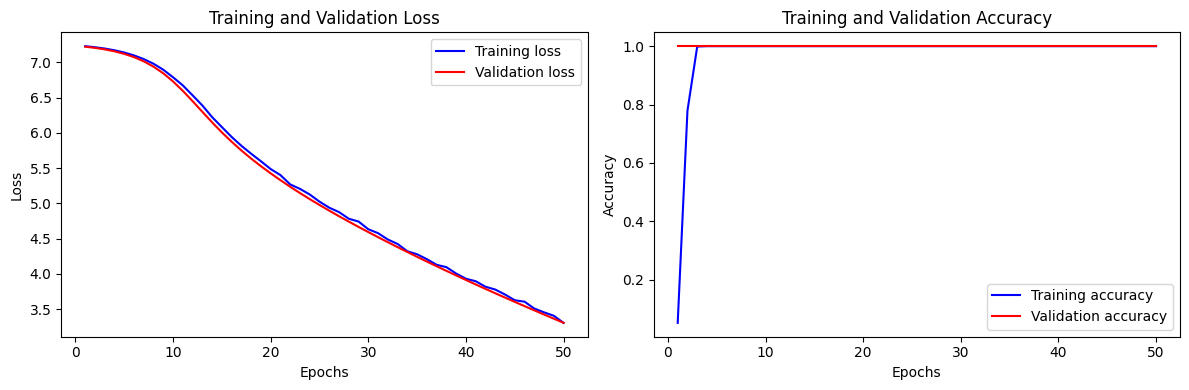

In [ ]:
# Analyse des courbes d'apprentissage
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Fonction pour générer du texte
def generate_text(model, tokenizer, seed_text, next_words, max_sequence_len):
    for _ in range(next_words):
        # Tokeniser le texte initial
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        # Adapter la longueur de la séquence d'entrée pour correspondre à max_sequence_length
        token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
        # Prédiction sur la séquence tokenisée
        predicted_probs = best_model.predict(token_list, verbose=0)[0]
        # Sélection du mot prédit
        predicted = np.random.choice(len(predicted_probs), p=predicted_probs)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Utilisation de la fonction pour générer une citation
seed_text = "La vie est "
next_words = 1  # Augmentez le nombre de mots à générer
max_sequence_length = 5  # Modifier la longueur maximale des séquences à 49 pour correspondre à la forme attendue par le modèle
generated_quote = generate_text(best_model, tokenizer, seed_text, next_words, max_sequence_length)

# Génération de la citation

print("Citation générée :", generated_quote)


Citation générée : La vie est  la sante  une richesse interieure qui se manifeste a travers notre bienetre physique
